In [1]:
# 3. Import libraries and modules
import numpy as np
  # for reproducibility
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.losses import binary_crossentropy
from keras.losses import sparse_categorical_crossentropy
from keras.losses import categorical_crossentropy
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


In [12]:
KFold = 10
rotateToTop = True
rawCLEi = False
rawDigEi = True


if rawCLEi:
    folder = '5x5_RawClEi'
    title = '5x5 Raw ClEi Data'
elif rawDigEi:
    folder = '5x5_RawDigEi'
    title = '5x5 Raw DigEi Data'
    
save_results = True
    
if rotateToTop:
    #Path to save the boosters
    save_models_path = './trained_models/%s' % folder
    #Path to save the boosters image results
    save_results_path = './Outputs/%s/' % folder
else:
    #Path to save the boosters
    save_models_path = './trained_models/Unp%s/' % folder
    #Path to save the boosters image results
    save_results_path = './Outputs/Unp%s/' % folder

In [13]:
if rawCLEi:
    final_shape = ['ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7', 'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13', 'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19', 'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25']
    shape = ['ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7', 'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13', 'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19', 'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25']
elif rawDigEi:
    final_shape = ['DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5', 'DigE6',
       'DigE7', 'DigE8', 'DigE9', 'DigE10', 'DigE11', 'DigE12',
       'DigE13', 'DigE14', 'DigE15', 'DigE16', 'DigE17', 'DigE18',
       'DigE19', 'DigE20', 'DigE21', 'DigE22', 'DigE23', 'DigE24',
       'DigE25']
    shape = ['DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5', 'DigE6',
       'DigE7', 'DigE8', 'DigE9', 'DigE10', 'DigE11', 'DigE12',
       'DigE13', 'DigE14', 'DigE15', 'DigE16', 'DigE17', 'DigE18',
       'DigE19', 'DigE20', 'DigE21', 'DigE22', 'DigE23', 'DigE24',
       'DigE25']

In [14]:
#Load Data
photons_data = pd.read_csv('../data/MCUpgrade_photons_5x5_fixed.dat', sep='\t')
mergedpi_data = pd.read_csv('../data/MCUpgrade_mergedpi0_5x5_fixed.dat', sep='\t')
photons_data.columns = ['p', 'pt', 'eta', 'area', 'nPVs', 'ClusterE', 'ClusterE9',
       'ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7',
       'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13',
       'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19',
       'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25',
       'DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5', 'DigE6',
       'DigE7', 'DigE8', 'DigE9', 'DigE10', 'DigE11', 'DigE12',
       'DigE13', 'DigE14', 'DigE15', 'DigE16', 'DigE17', 'DigE18',
       'DigE19', 'DigE20', 'DigE21', 'DigE22', 'DigE23', 'DigE24',
       'DigE25', 'isPhr2', 'isPhr2r4', 'isPhasym', 'isPhkappa',
       'isPhEseed', 'isPhE2', 'Sxx', 'Sxy', 'Syy']
mergedpi_data.columns = ['p', 'pt', 'eta', 'area', 'nPVs', 'ClusterE', 'ClusterE9',
       'ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7',
       'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13',
       'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19',
       'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25',
       'DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5', 'DigE6',
       'DigE7', 'DigE8', 'DigE9', 'DigE10', 'DigE11', 'DigE12',
       'DigE13', 'DigE14', 'DigE15', 'DigE16', 'DigE17', 'DigE18',
       'DigE19', 'DigE20', 'DigE21', 'DigE22', 'DigE23', 'DigE24',
       'DigE25', 'isPhr2', 'isPhr2r4', 'isPhasym', 'isPhkappa',
       'isPhEseed', 'isPhE2', 'Sxx', 'Sxy', 'Syy']

In [15]:
which = 2
suma = 0
for i in range(1,26):
    stri = 'ClE%d' % i
    suma = suma + mergedpi_data.loc[which][stri]
    
print ('Cluster 5x5: %f' % suma)
suma = 0
for i in range(7,10):
    stri = 'ClE%d' % i
    suma = suma + mergedpi_data.loc[which][stri]
for i in range(12,14):
    stri = 'ClE%d' % i
    suma = suma + mergedpi_data.loc[which][stri]
for i in range(17,19):
    stri = 'ClE%d' % i
    suma = suma + mergedpi_data.loc[which][stri]
print ('Cluster 3x3: %f' % suma)
print ('ClusterE9: %f' % mergedpi_data.loc[which]['ClusterE9'])
print ('ClusterE: %f' % mergedpi_data.loc[which]['ClusterE'])

Cluster 5x5: 199196.293627
Cluster 3x3: 161422.691041
ClusterE9: 187558.633538
ClusterE: 187558.633538


In [16]:
# -0
m_d = pd.DataFrame()
p_d = pd.DataFrame()
data = pd.DataFrame()
#Retrive important columns
p_d = photons_data[list (shape)]
m_d = mergedpi_data[list (shape)]

def rotate_to_top_matrice(m):
    max = 0
    
    #top = m[0][2] + m[1][2]
    #bot = m[3][2] + m[4][2]
    #left = m[2][0] + m[2][1]
    #right = m[2][3] + m[2][4]
    
    top = m[1][2]
    bot = m[3][2]
    left = m[2][1]
    right = m[2][3]
    
    if (top >= bot) & (top >= left) & (top >= right):
        max = 0
    elif (bot >= left) & (bot >= right):
        max = 2
    elif left >= right:
        max = 3
    else:
        max = 1
    
    mat = np.rot90(m, max)
    
    top = m[1][2]
    top_left = mat[1][1]
    top_right = mat[1][3]
    bot_left = mat[3][1]
    bot_right = mat[3][3]
    
    if (top_left >= top_right) & (top_left >= bot_left) & (top_left >= bot_right) & (top_left > top):
        max = 0
    elif (top_right >= bot_left) & (top_right >= bot_right) & (top_right > top):
        max = 1
    elif (bot_left >= bot_right) & (bot_left > top):
        max = 3
    elif bot_right > top:
        max = 2
         
    
    return np.rot90(mat, max)

if rotateToTop:
    # -1
    # Rotate matrices to top direction
    p_d = pd.DataFrame(np.array([rotate_to_top_matrice(m) for m in p_d.values.reshape((-1, 5, 5, 1))]).reshape(-1,25))
    p_d.columns = shape
    m_d = pd.DataFrame(np.array([rotate_to_top_matrice(m) for m in m_d.values.reshape((-1, 5, 5, 1))]).reshape(-1,25))
    m_d.columns = shape
# -2
#Normalise data
    #Divide each cell with the entire energy at the cluster
p_d = p_d[shape]
m_d = m_d[shape]
p_d = p_d.assign(suma = p_d.sum(axis=1));
m_d = m_d.assign(suma = m_d.sum(axis=1));
p_d_norm = (p_d.T / p_d.suma).T
m_d_norm = (m_d.T / m_d.suma).T

# -4
#Add Labels to data
m_d_norm['area'] = mergedpi_data[['area']]
p_d_norm['area'] = photons_data[['area']]

#Add category = 0 column to dataframe, so we identify merged pi0 as 0
m_d_norm = m_d_norm.assign(category=pd.Series(np.full((len(m_d_norm['area'])), 0)).values)

#Add category = 1 column to dataframe, so we identify photons as 1
p_d_norm = p_d_norm.assign(category=pd.Series(np.full((len(p_d_norm['area'])), 1)).values)

# -5 
# Equilibrate category classes
p_d_norm_0 = p_d_norm[p_d_norm['area'] == 0]
p_d_norm_0 = p_d_norm_0.iloc[0:len(m_d_norm[m_d_norm['area'] == 0])]

p_d_norm_1 = p_d_norm[p_d_norm['area'] == 1]
p_d_norm_1 = p_d_norm_1.iloc[0:len(m_d_norm[m_d_norm['area'] == 1])]

p_d_norm_2 = p_d_norm[p_d_norm['area'] == 2]
p_d_norm_2 = p_d_norm_2.iloc[0:len(m_d_norm[m_d_norm['area'] == 2])]

print (len(p_d_norm_0) + len(p_d_norm_1) + len(p_d_norm_2) == len(m_d_norm))
p_d_norm = p_d_norm_0.append(p_d_norm_1).append(p_d_norm_2)


# -6
#Merge both mergedpi0 and photons into a single datagrame
data = m_d_norm.append(p_d_norm)

True


###### 
#Function to divide data
#Param area [0,1,2] ECAL area
#test_fraction, the fraction of data to preserve for test
def divide_data(area, test_fraction):
    X_train, X_test, y_train, y_test = train_test_split(data[data['area'] == area][final_shape],
                                                data[data['area'] == area][['category']], test_size=test_fraction, random_state=0)
    return X_train, X_test, y_train, y_test
    




In [17]:
#Function to divide data
#Param area [0,1,2] ECAL area
#test_fraction, the fraction of data to preserve for test
def divide_data(area, test_fraction):
    X_train, X_test, y_train, y_test = train_test_split(data[data['area'] == area][final_shape],
                                                data[data['area'] == area][['category']], test_size=test_fraction, random_state=0)
    return X_train, X_test, y_train, y_test

In [18]:
def print_model_history(hist):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
    # Plot training & validation accuracy values
    axs[0].plot(hist.history['acc'])
    axs[0].plot(hist.history['val_acc'])
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Test'], loc='upper left')


    # Plot training & validation loss values
    axs[1].plot(hist.history['loss'])
    axs[1].plot(hist.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [19]:
#PProva 1
def build_classifier(optimizer = 'sgd'):
    model = Sequential()

    model.add(Conv2D(16, kernel_size=3, padding="same", strides=2, kernel_initializer = 'glorot_uniform', use_bias=True, bias_initializer='zeros', input_shape=(5,5,1)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Conv2D(8, kernel_size=2, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Conv2D(8, kernel_size=1, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Flatten())
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(20))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


    


In [20]:
def save_models():
    for i in range(KFold):
        model_json = in_models[i].to_json()
        with open("%s/%d_Fold%d.json" % (save_models_path, 2, i), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        in_models[i].save_weights("%s/%d_Fold%d.h5" % (save_models_path, 2, i))
    for i in range(KFold):
        model_json = mid_models[i].to_json()
        with open("%s/%d_Fold%d.json" % (save_models_path, 1, i), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        mid_models[i].save_weights("%s/%d_Fold%d.h5" % (save_models_path, 1, i))
    for i in range(KFold):
        model_json = out_models[i].to_json()
        with open("%s/%d_Fold%d.json" % (save_models_path, 0, i), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        out_models[i].save_weights("%s/%d_Fold%d.h5" % (save_models_path, 0, i))
    
def load_models():
    in_models = []
    mid_models = []
    out_models = []
    for i in range(KFold):
        json_file = open("%s/%d_Fold%d.json" % (save_models_path, 2, i), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        in_models.append(model_from_json(loaded_model_json))
        # load weights into new model
        in_models[i].load_weights("%s/%d_Fold%d.h5" % (save_models_path, 2, i))
        
    for i in range(KFold):
        json_file = open("%s/%d_Fold%d.json" % (save_models_path, 1, i), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        mid_models.append(model_from_json(loaded_model_json))
        # load weights into new model
        mid_models[i].load_weights("%s/%d_Fold%d.h5" % (save_models_path, 1, i))
        
    for i in range(KFold):
        json_file = open("%s/%d_Fold%d.json" % (save_models_path, 0, i), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        out_models.append(model_from_json(loaded_model_json))
        # load weights into new model
        out_models[i].load_weights("%s/%d_Fold%d.h5" % (save_models_path, 0, i))
    
    return out_models, mid_models, in_models
   
def plot_category_predictions(predictions, ytest, area, fold, data_title = title):
    
    #xgb.plot_importance(booster,grid=True);
    
    fig = plt.figure(figsize=(20,10));
    plt.hist(predictions[ytest.reshape(-1).astype(bool)],bins=np.linspace(0,1,50),
             histtype='step',color='midnightblue',label='$\gamma$');
    plt.hist(predictions[~(ytest.reshape(-1).astype(bool))],bins=np.linspace(0,1,50),
             histtype='step',color='firebrick',label='$\pi$');
    # make the plot readable
    plt.xlabel('Prediction from CNN',fontsize=12);
    plt.ylabel('Samples',fontsize=12);
    plt.legend(frameon=False);
    plt.title("%s Area; Fold %d; %s; CNN" % (area, fold, data_title) ,fontsize=13);
    return fig

def reproduce_results(path, data_title = title):
    out_boosters, mid_boosters, in_boosters = load_models()
    
    X_train, X_test, y_train, y_test = divide_data(2,0)
    in_predictions, in_y_tests, in_mean_fpr, in_mean_tpr, in_mean_auc, in_std_auc, in_plot, in_fig = CV_CNN_trained(X_train, y_train, KFold, in_boosters)
    plot_results(in_mean_fpr, in_mean_tpr, in_mean_auc, in_std_auc, in_plot, 'b', "Inner Area; %s; CNN" % title)

    in_fig.savefig('%s2.png' % (path))
    for i in range(KFold):
        in_fig = plot_category_predictions(in_predictions[i],  in_y_tests[i], 'Inner', i)
        in_fig.savefig('%s2_fold%d.png' % (path,i))
        
    X_train, X_test, y_train, y_test = divide_data(1,0)
    mid_predictions, mid_y_tests, mid_mean_fpr, mid_mean_tpr, mid_mean_auc, mid_std_auc, mid_plot, mid_fig = CV_CNN_trained(X_train, y_train, KFold, mid_boosters)
    plot_results(mid_mean_fpr, mid_mean_tpr, mid_mean_auc, mid_std_auc, mid_plot, 'g', "Middle Area; %s; CNN" % title)

    mid_fig.savefig('%s1.png' % (path))
    for i in range(KFold):
        mid_fig = plot_category_predictions(mid_predictions[i], mid_y_tests[i], 'Middle', i)
        mid_fig.savefig('%s1_fold%d.png' % (path,i))
    
    X_train, X_test, y_train, y_test = divide_data(0,0)
    out_predictions, out_y_tests, out_mean_fpr, out_mean_tpr, out_mean_auc, out_std_auc, out_plot, out_fig = CV_CNN_trained(X_train, y_train, KFold, out_boosters)
    plot_results(out_mean_fpr, out_mean_tpr, out_mean_auc, out_std_auc, out_plot, 'r', "Outer Area; %s; CNN" % title)


    out_fig.savefig('%s0.png' % (path))
    for i in range(KFold):
        out_fig = plot_category_predictions(out_predictions[i], out_y_tests[i], 'Outer', i)
        out_fig.savefig('%s0_fold%d.png' % (path,i))
    
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    tprs.append(interp(mean_fpr, in_mean_fpr, in_mean_tpr))
    tprs[-1][0] = 0.0
    aucs.append(in_mean_auc)

    tprs.append(interp(mean_fpr, out_mean_fpr, out_mean_tpr))
    tprs[-1][0] = 0.0
    aucs.append(out_mean_auc)

    tprs.append(interp(mean_fpr, mid_mean_fpr, mid_mean_tpr))
    tprs[-1][0] = 0.0
    aucs.append(mid_mean_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)


    final_fig = plt.figure(figsize=(10,10))

    plt.plot(out_mean_fpr, out_mean_tpr, color='r', label=r'Outer Area Mean ROC (AUC = %0.2f)' % (out_mean_auc),
                 lw=2, alpha=.8)
    plt.plot(mid_mean_fpr, mid_mean_tpr, color='g', label=r'Middle Area Mean ROC (AUC = %0.2f)' % (mid_mean_auc),
                 lw=2, alpha=.8)
    plt.plot(in_mean_fpr, in_mean_tpr, color='b', label=r'Inner Area Mean ROC (AUC = %0.2f)' % (in_mean_auc),
                 lw=2, alpha=.8)
    plt.plot(mean_fpr, mean_tpr, color='c', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                 lw=2, alpha=.8)

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.legend(loc = 'lower right')
    plt.title('CNN; %s; Mean AUC' % data_title)
    plt.ylabel('$\gamma$ efficiency')
    plt.xlabel('$\pi^0$ efficiency')
    final_fig.savefig('%s0_1_2.png' % path)

def CV_CNN_trained(X, Y, nsplits, models):

    cv = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state = 42)
    
    tprs = []
    aucs = []
    i = 0
    
    predictions = []
    y_tests = []
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(10,10))
    for itrain, itest in cv.split(X, Y):
        X_train = np.array(X.iloc[itrain])
        X_test = np.array(X.iloc[itest])
        y_train = np.array(Y.iloc[itrain])
        y_test = np.array(Y.iloc[itest])
        
        y_tests.append(y_test)
        
        predictions.append(models[i].predict(X_test.reshape((-1, 5, 5, 1))))
       
        fpr, tpr, threshold = metrics.roc_curve(y_test, predictions[i])

        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        print(i)
        i += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    

    
    return predictions, y_tests, mean_fpr, mean_tpr, mean_auc, std_auc, plt, fig

def CV_CNN(X, Y, nsplits):

    cv = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state = 42)
    
    tprs = []
    aucs = []
    i = 0
    models = []
    predictions = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    for itrain, itest in cv.split(X, Y):
        X_train = np.array(X.iloc[itrain])
        X_test = np.array(X.iloc[itest])
        y_train = np.array(Y.iloc[itrain])
        y_test = np.array(Y.iloc[itest])
        models.append(build_classifier('sgd'))
        
        models[i].fit(X_train.reshape((-1, 5, 5, 1)), (y_train),
                    batch_size=150, epochs=50, verbose=0)
    
        
        predictions.append(models[i].predict(X_test.reshape((-1, 5, 5, 1))))
        
       
        fpr, tpr, threshold = metrics.roc_curve(y_test, predictions[i])

        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        print(i)
        i += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    

    
    return models, predictions, mean_fpr, mean_tpr, mean_auc, std_auc, plt

def plot_results(mean_fpr, mean_tpr, mean_auc, std_auc, plot, color, title):
    plot.plot(mean_fpr, mean_tpr, color=color, label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    plot.xlim([-0.01, 1.01])
    plot.ylim([-0.01, 1.01])
    plot.legend(loc = 'lower right')
    plot.ylabel('$\gamma$ efficiency')
    plot.xlabel('$\pi^0$ efficiency')
    plot.title(title)
    plot.show()

0
1
2
3
4
5
6
7
8
9


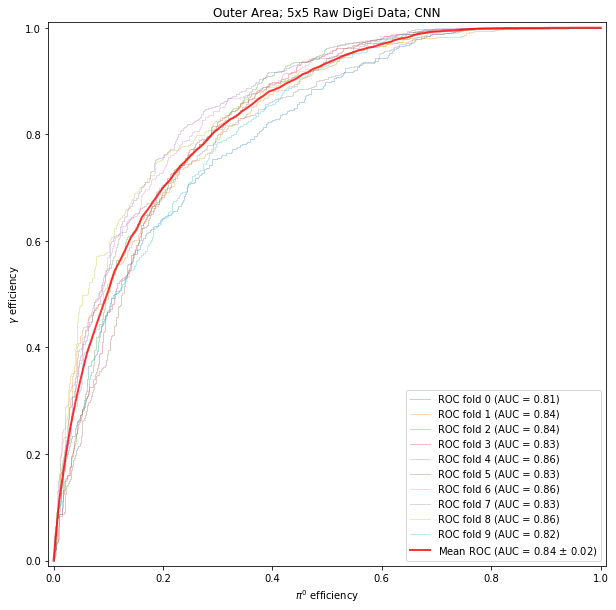

In [21]:
X_train, X_test, y_train, y_test = divide_data(0,0)
out_models, out_predictions, out_mean_fpr, out_mean_tpr, out_mean_auc, out_std_auc, out_plot = CV_CNN(X_train, y_train, KFold)
plot_results(out_mean_fpr, out_mean_tpr, out_mean_auc, out_std_auc, out_plot, 'r', "Outer Area; %s; CNN" % title)



0
1
2
3
4
5
6
7
8
9


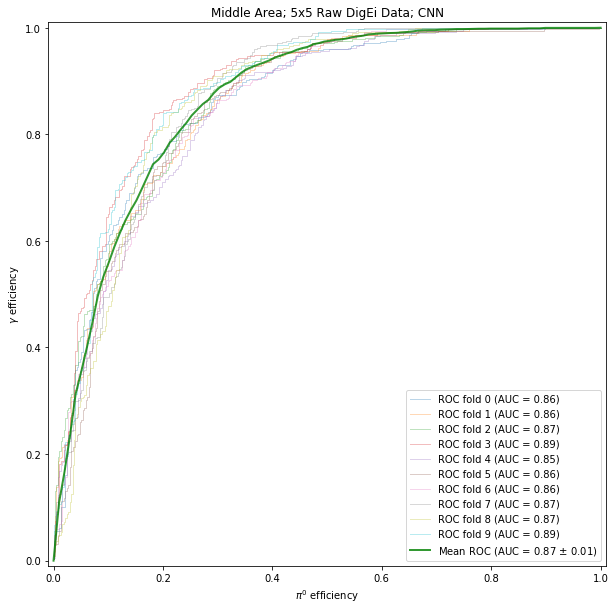

In [22]:
X_train, X_test, y_train, y_test = divide_data(1,0)
mid_models, mid_predictions, mid_mean_fpr, mid_mean_tpr, mid_mean_auc, mid_std_auc, mid_plot = CV_CNN(X_train, y_train, KFold)
plot_results(mid_mean_fpr, mid_mean_tpr, mid_mean_auc, mid_std_auc, mid_plot, 'g', "Middle Area; %s; CNN" % title)

0
1
2
3
4
5
6
7
8
9


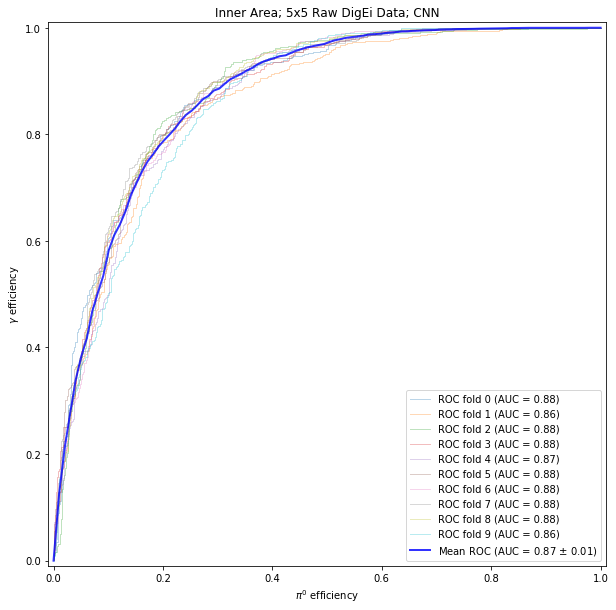

In [23]:
X_train, X_test, y_train, y_test = divide_data(2,0)
in_models, in_predictions, in_mean_fpr, in_mean_tpr, in_mean_auc, in_std_auc, in_plot = CV_CNN(X_train, y_train, KFold)
plot_results(in_mean_fpr, in_mean_tpr, in_mean_auc, in_std_auc, in_plot, 'b', "Inner Area; %s; CNN" % title)


0
1
2
3
4
5
6
7
8
9


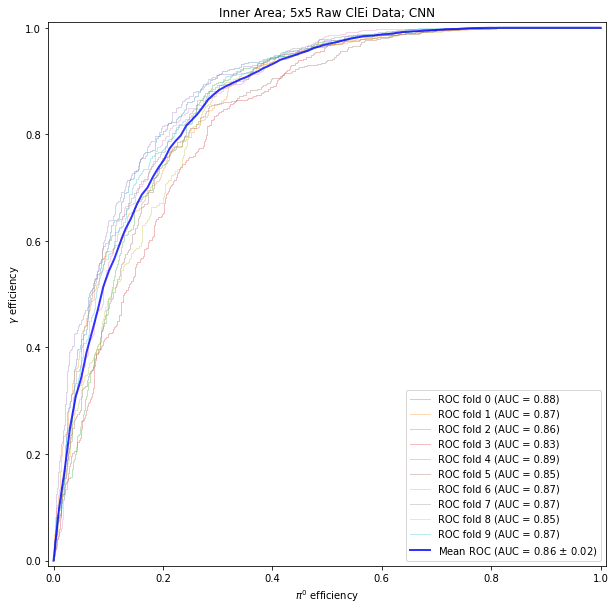

0
1
2
3
4
5
6
7
8
9


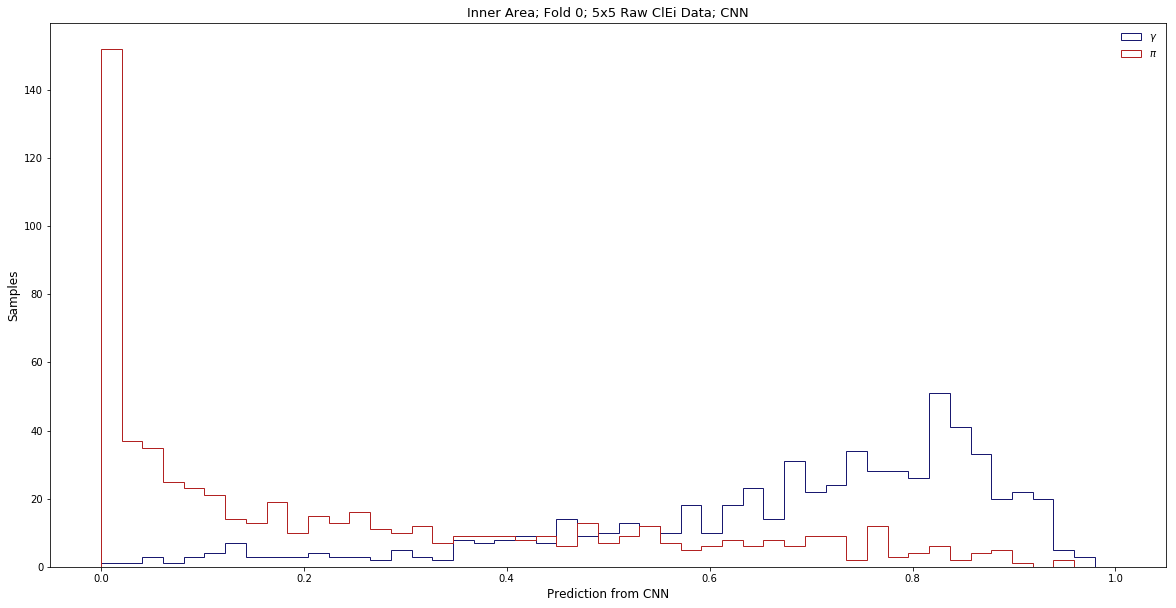

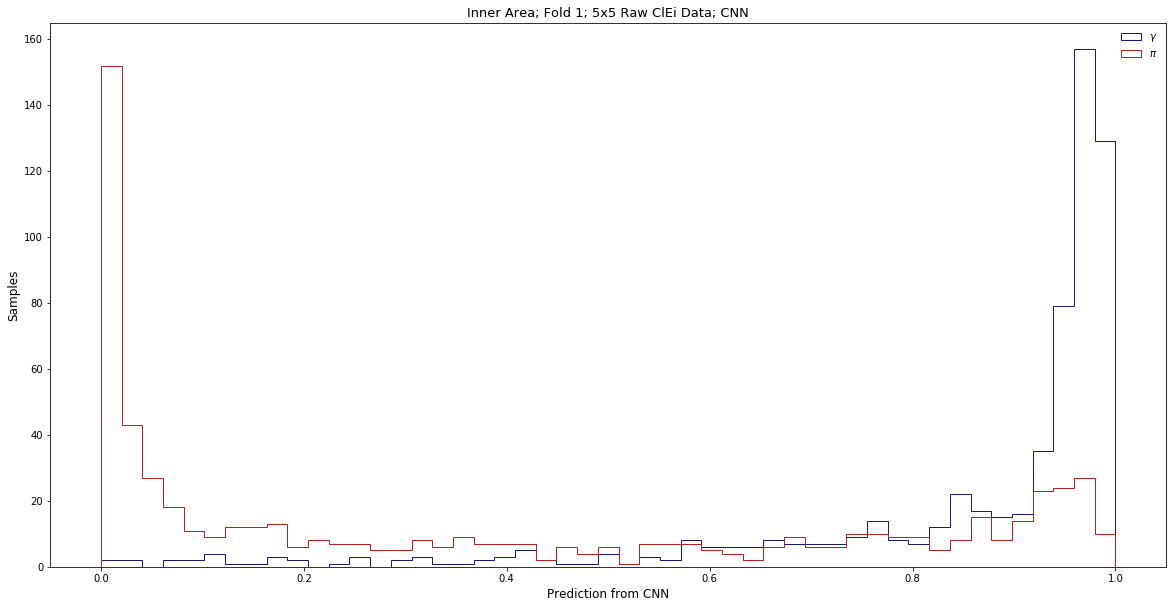

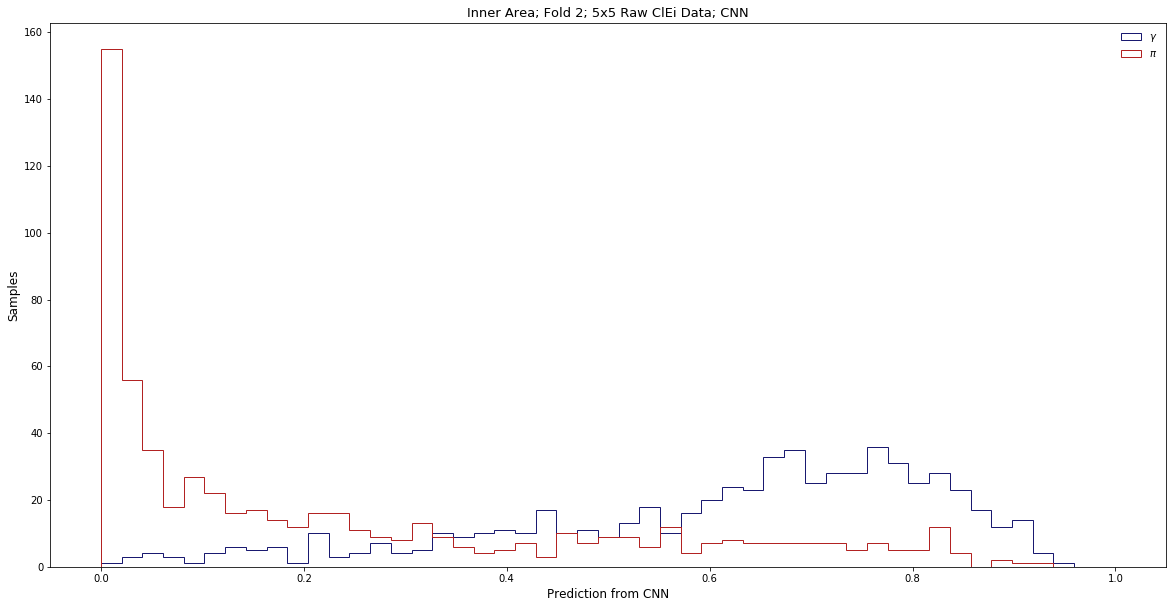

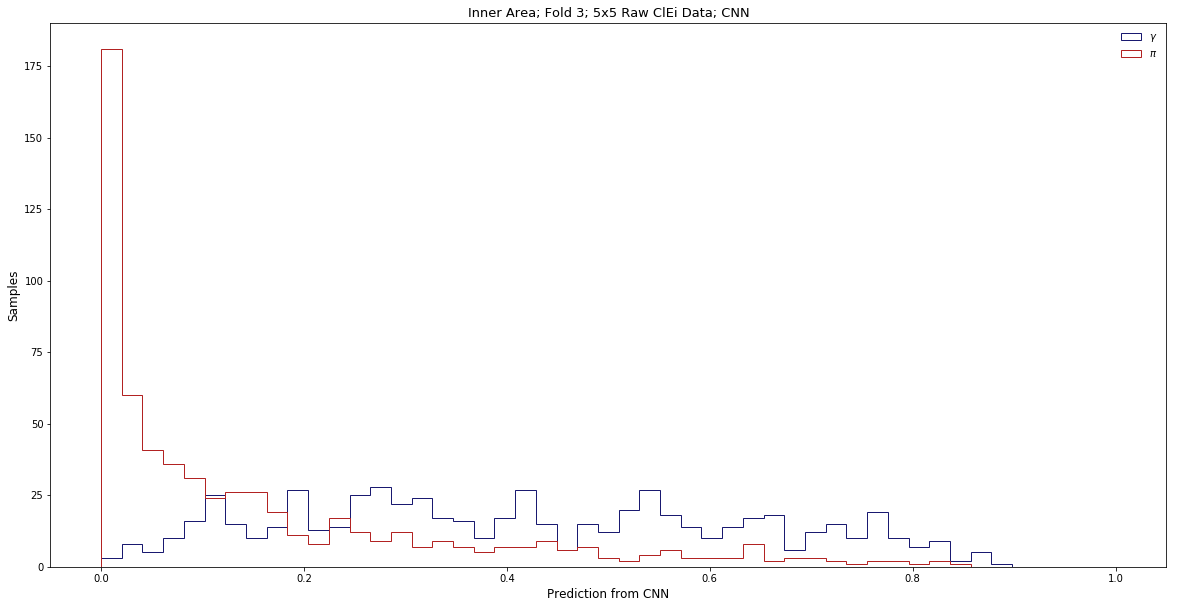

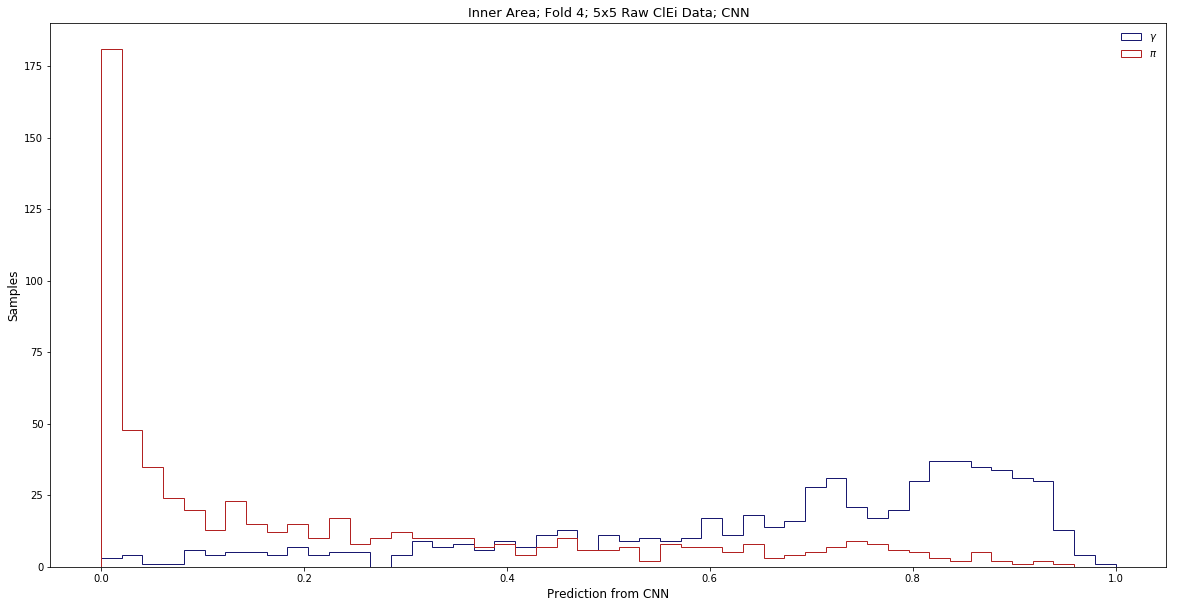

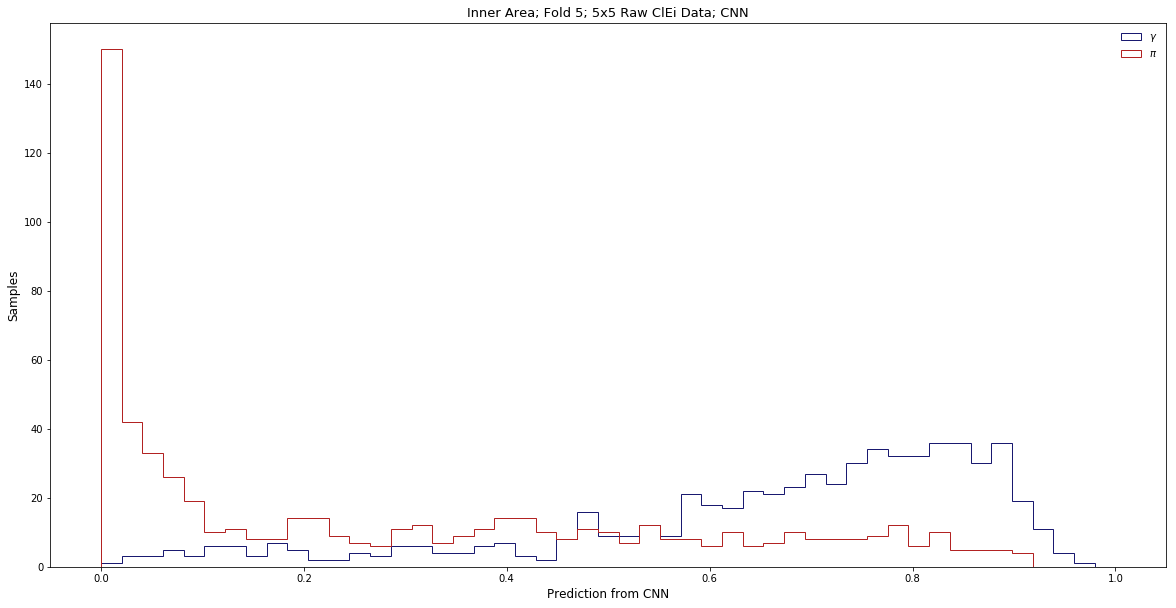

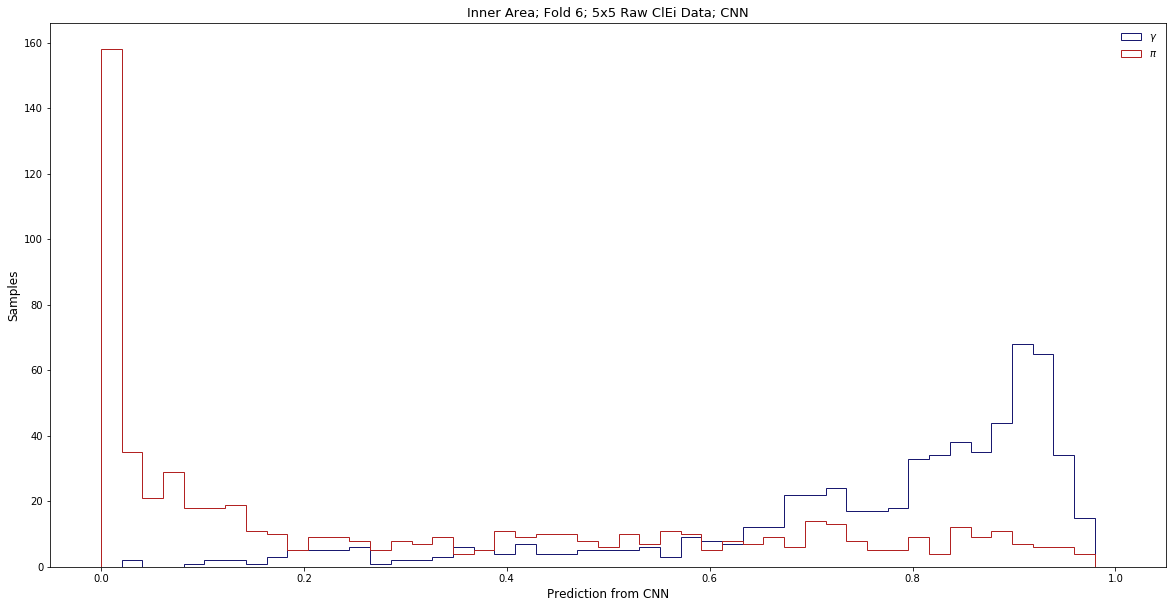

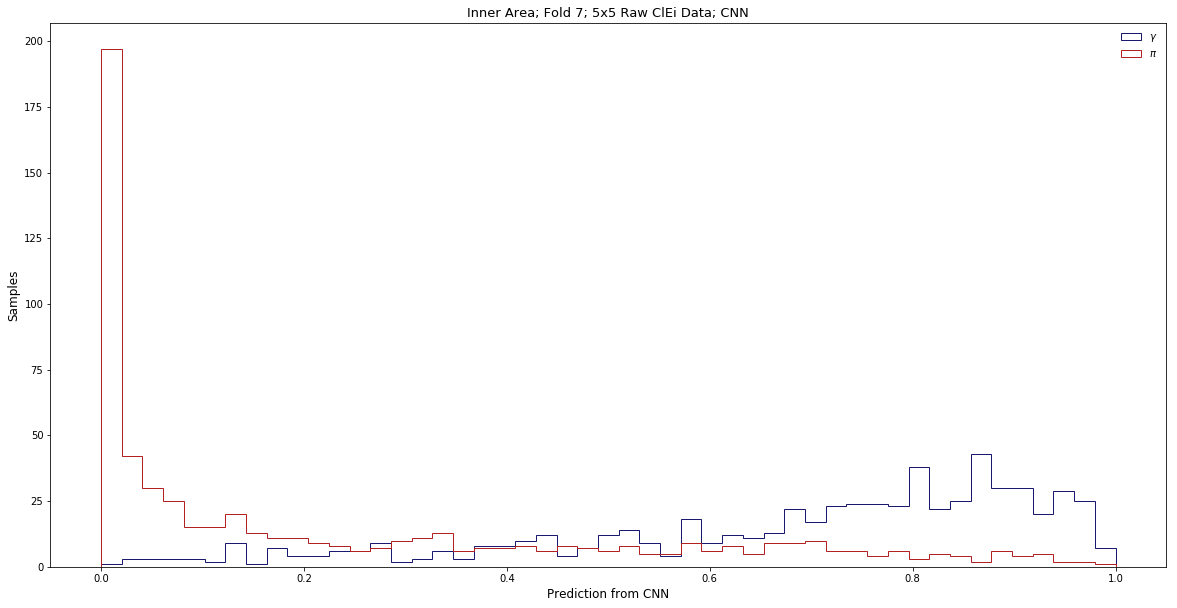

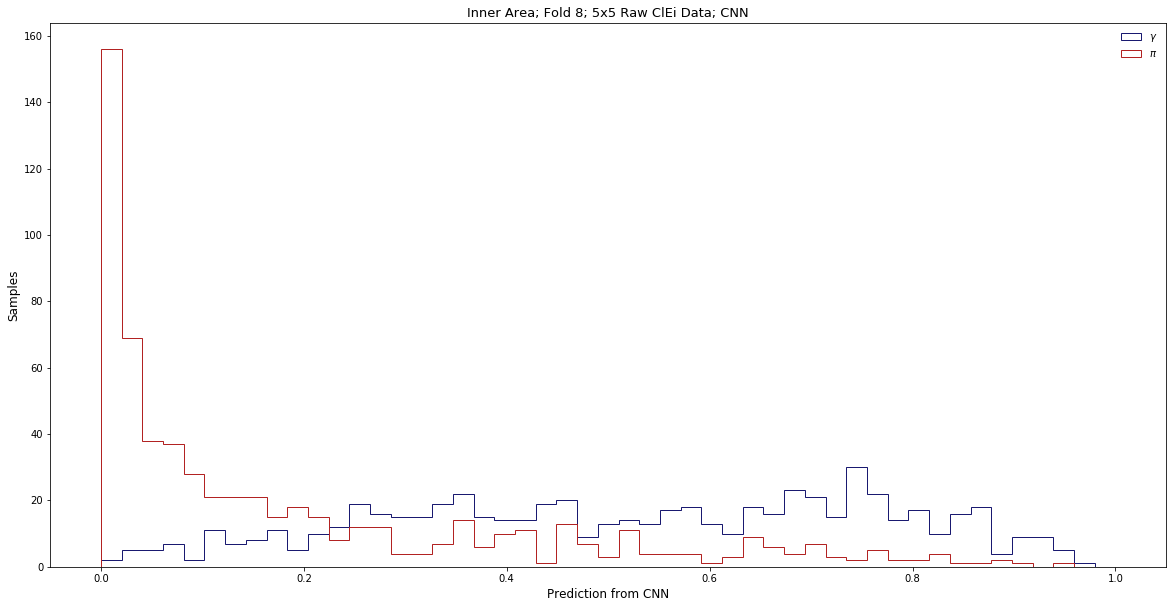

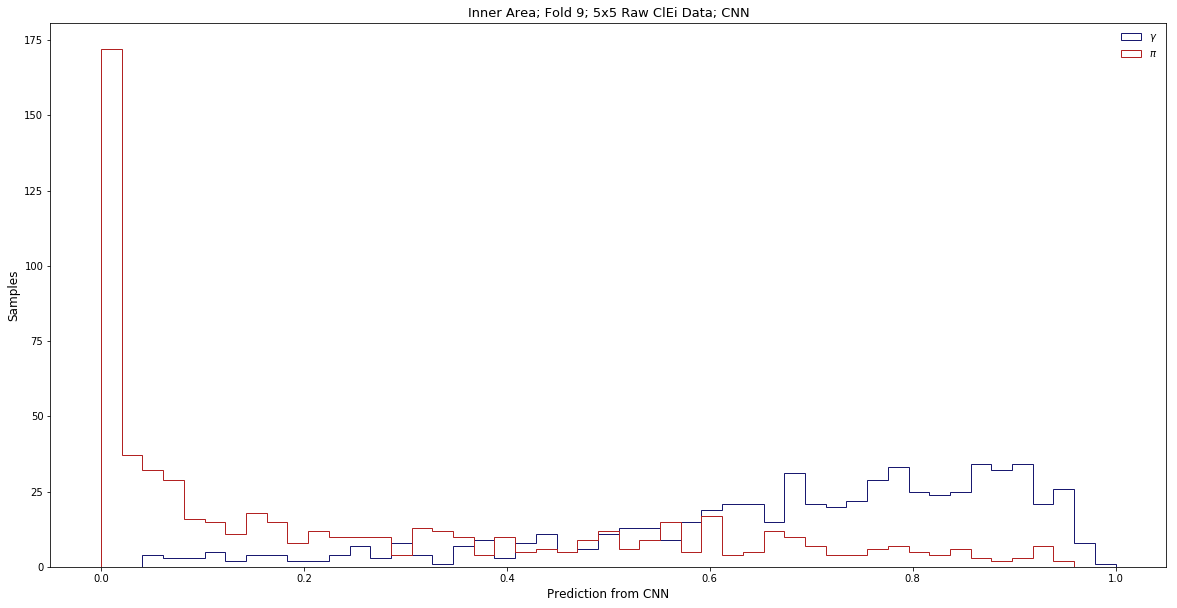

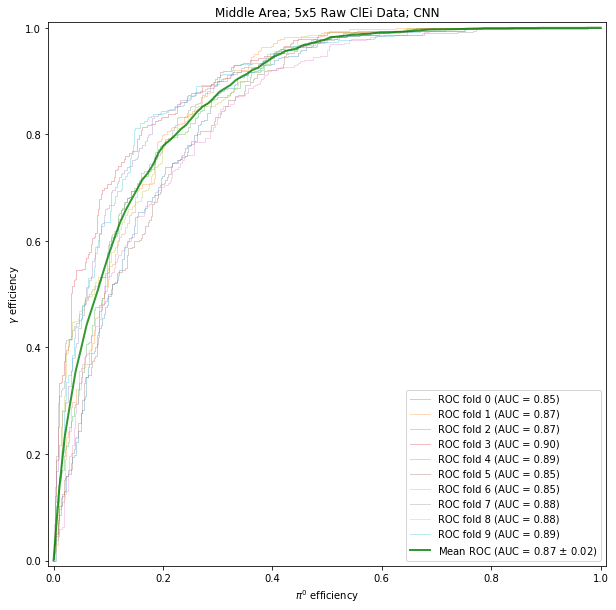

0
1
2
3
4
5
6
7
8
9


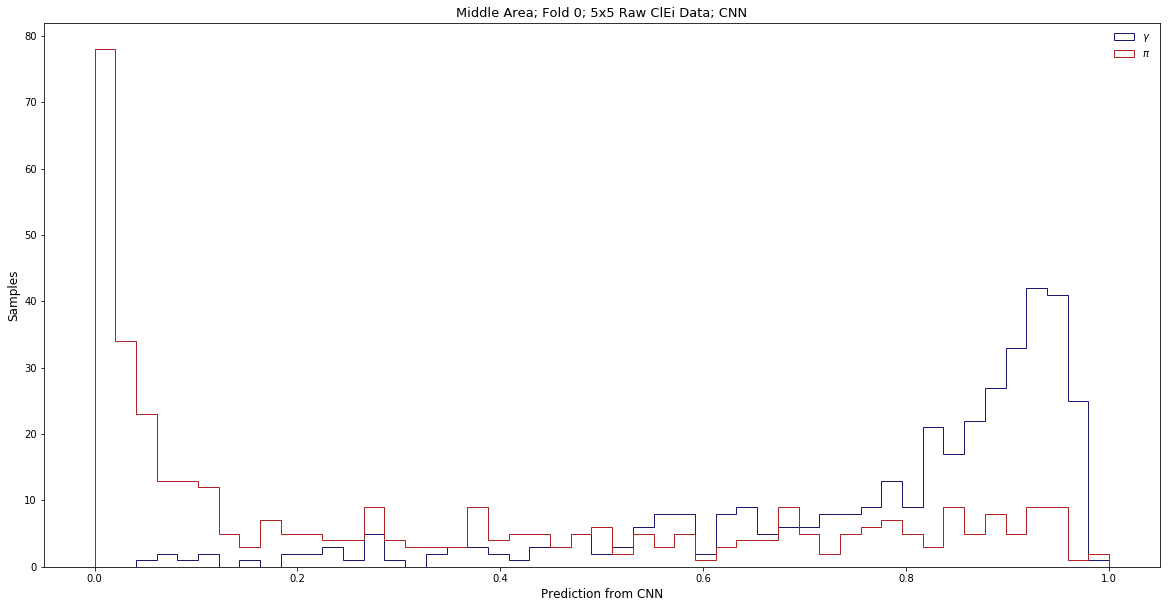

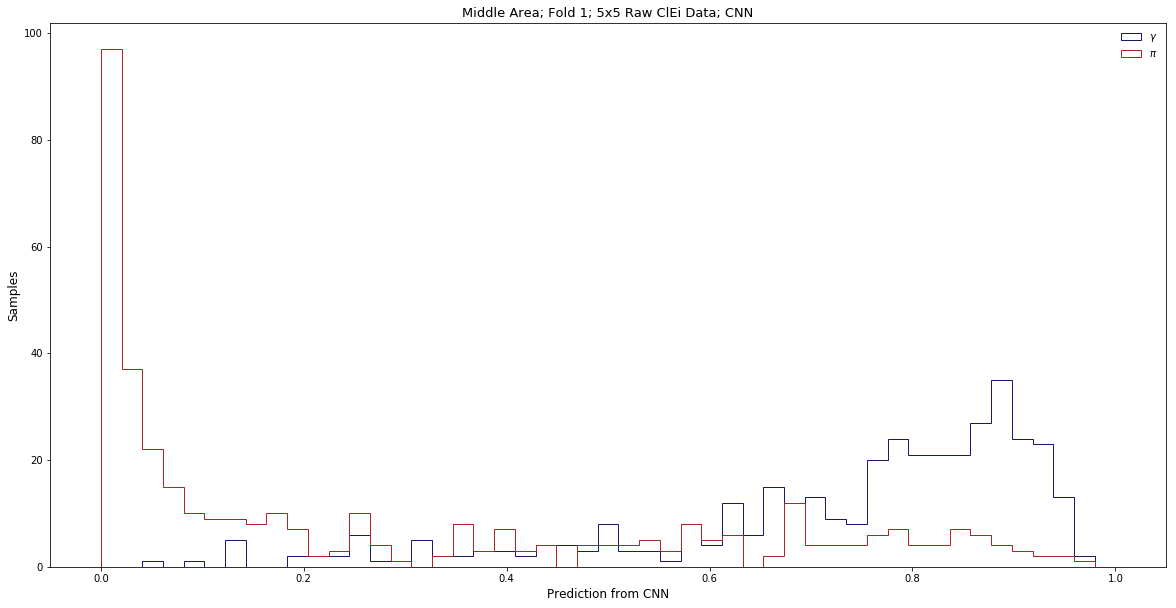

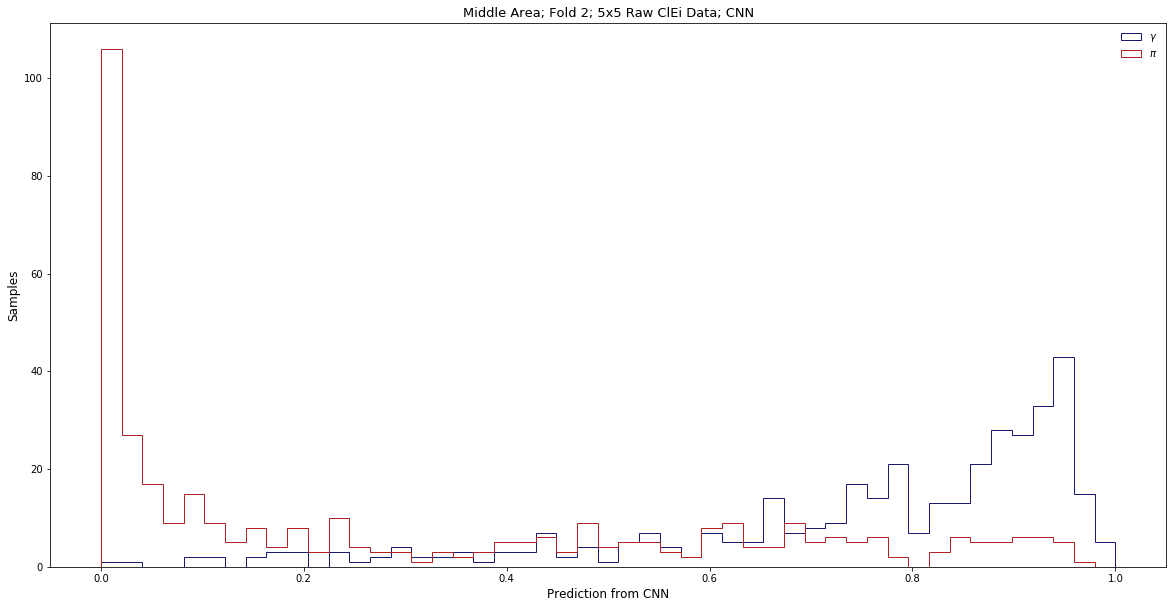

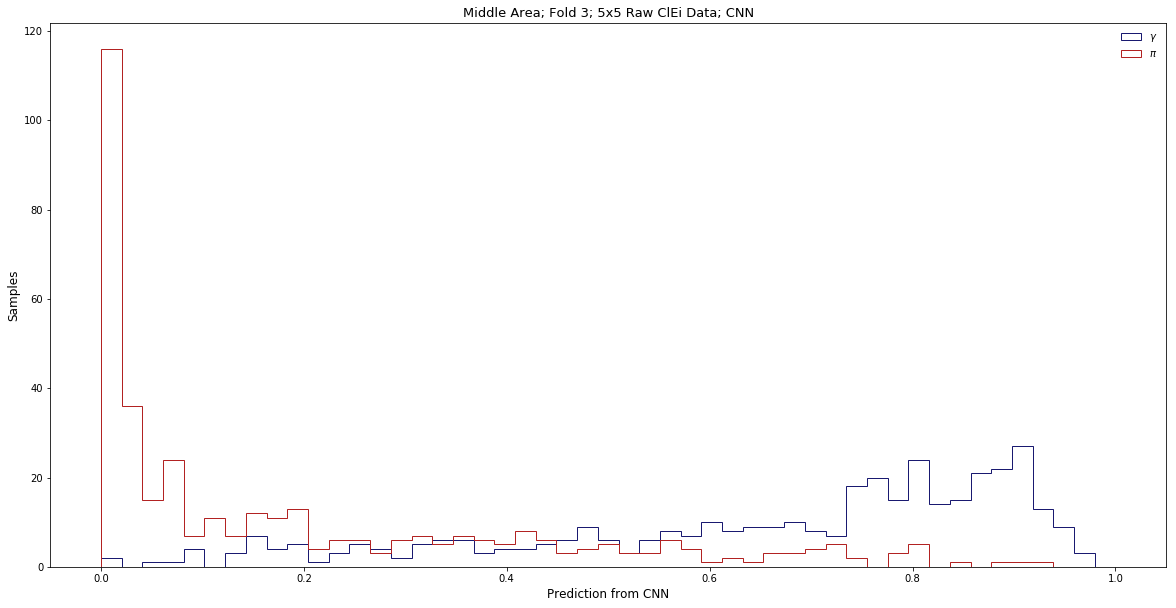

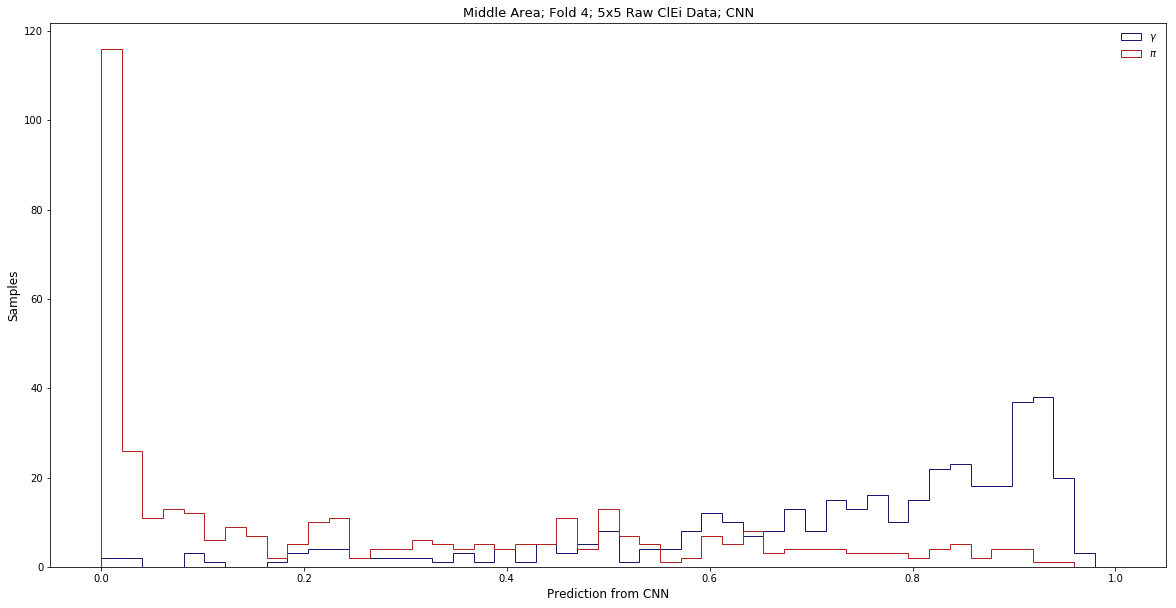

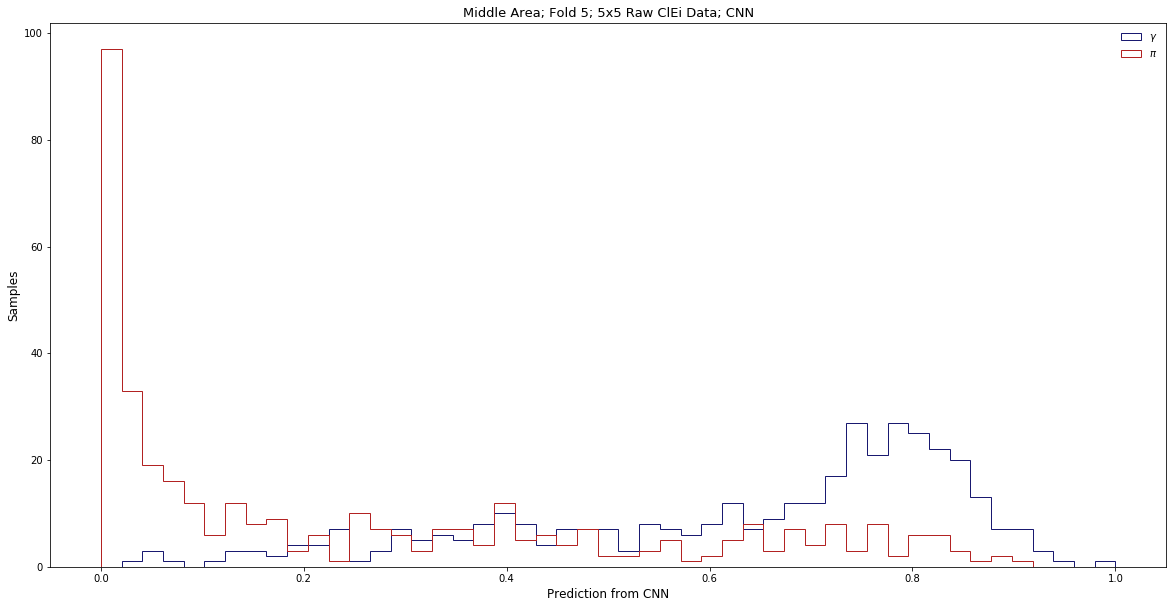

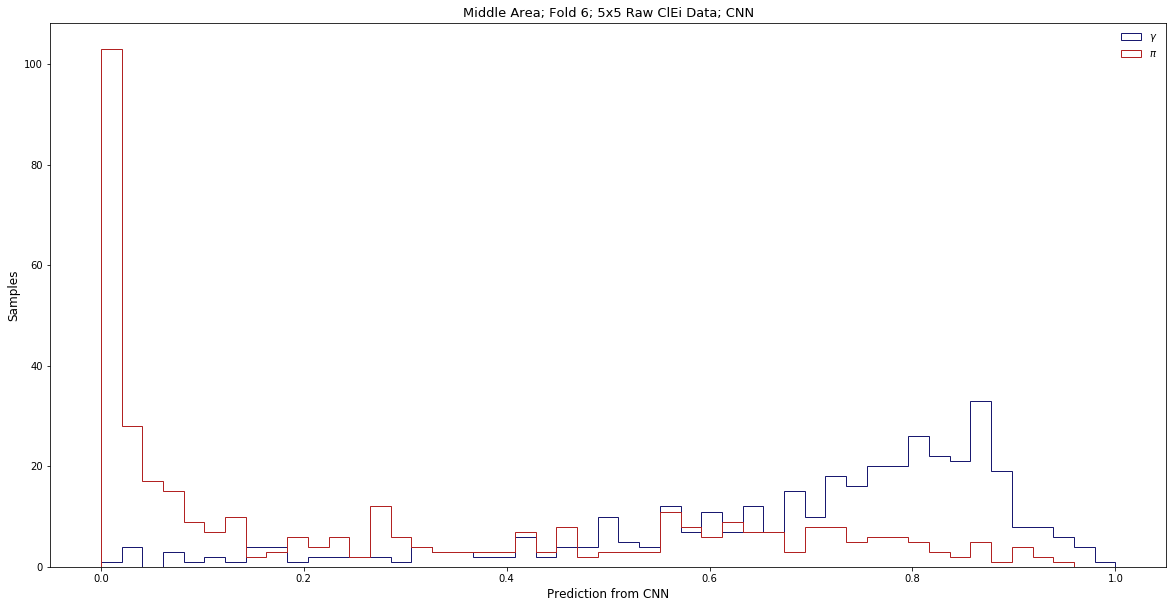

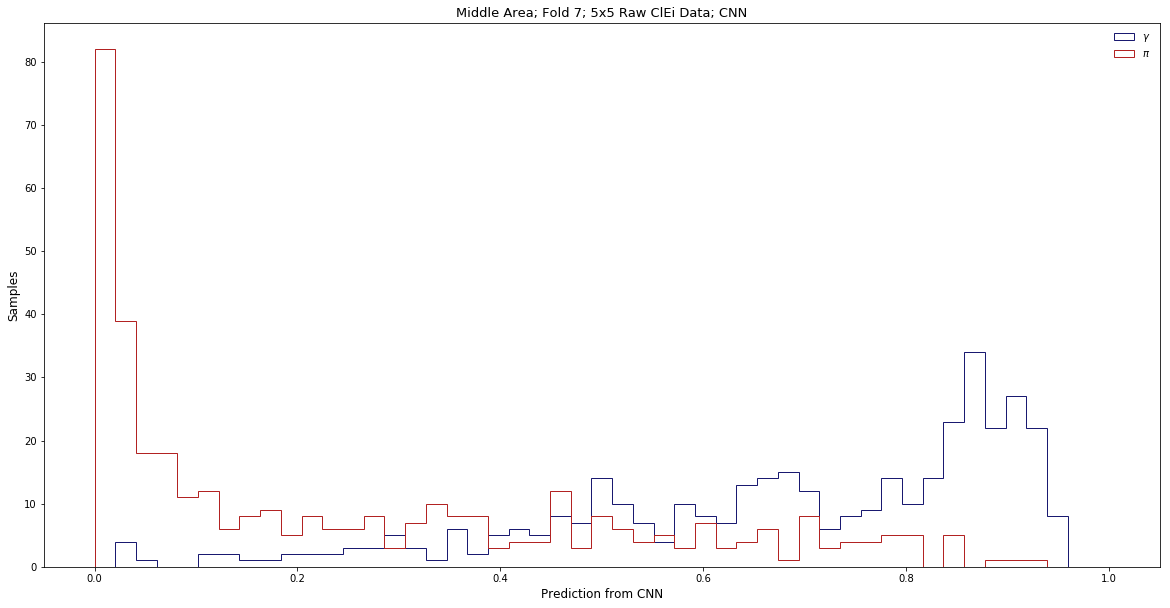

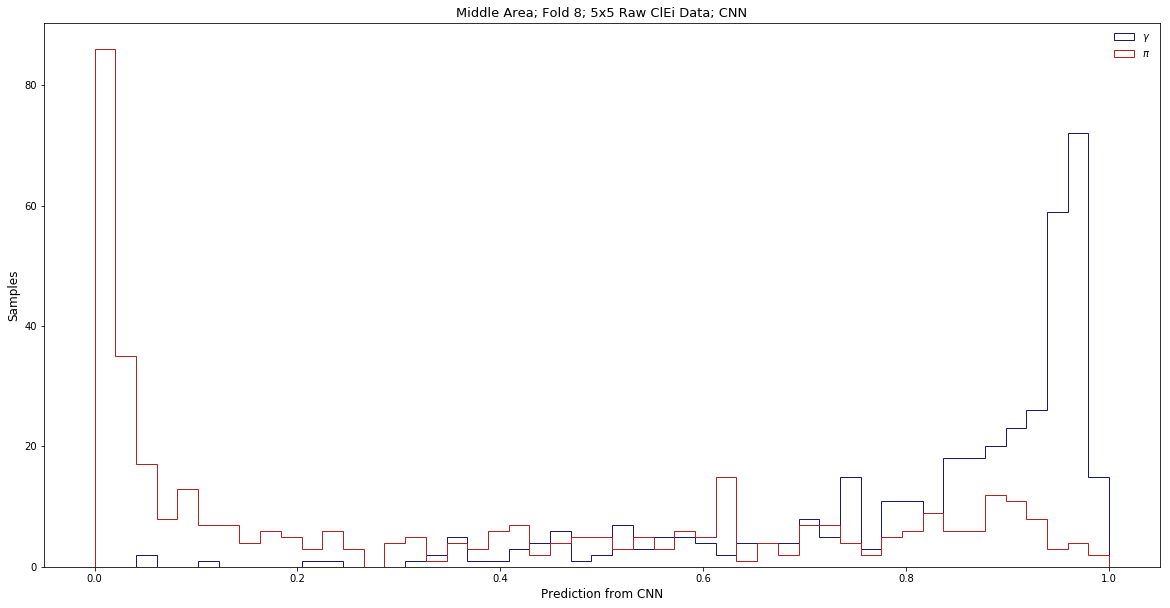

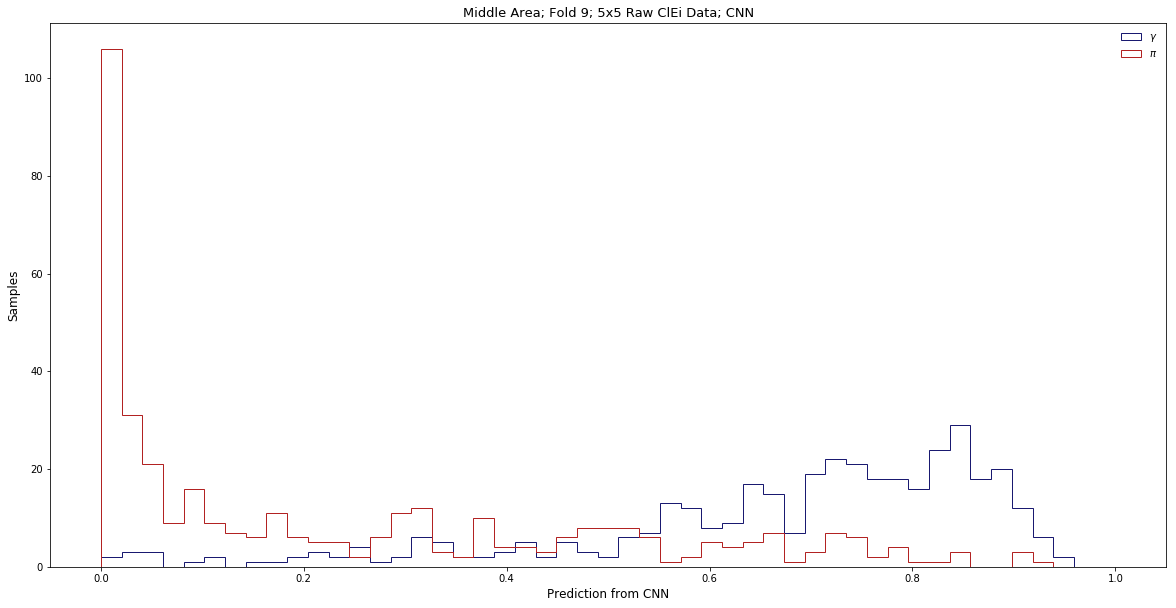

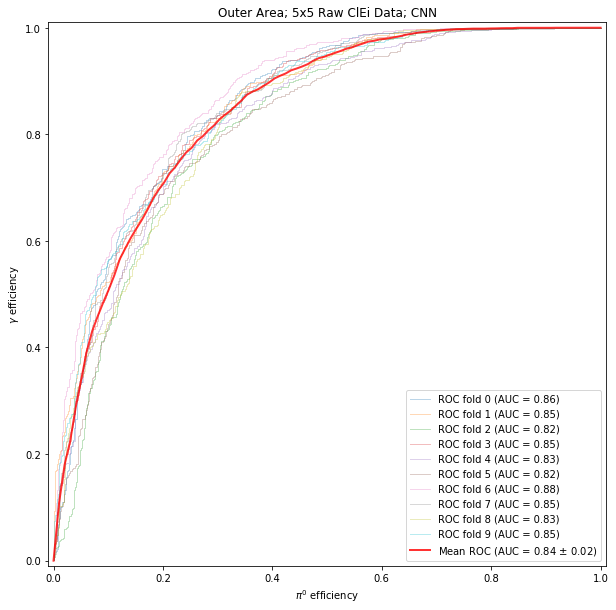

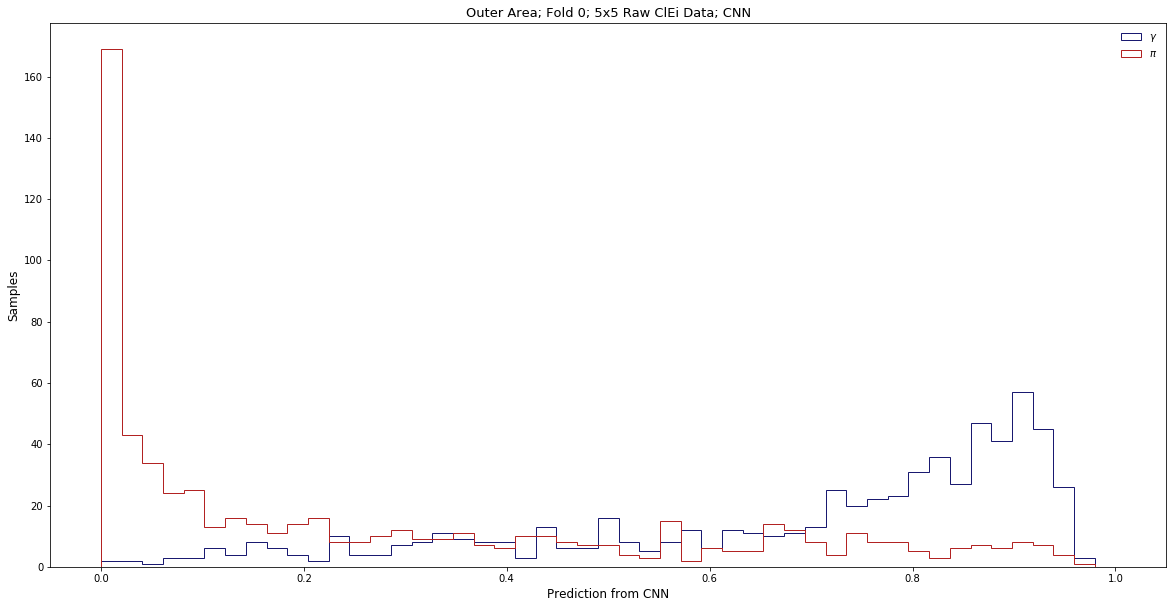

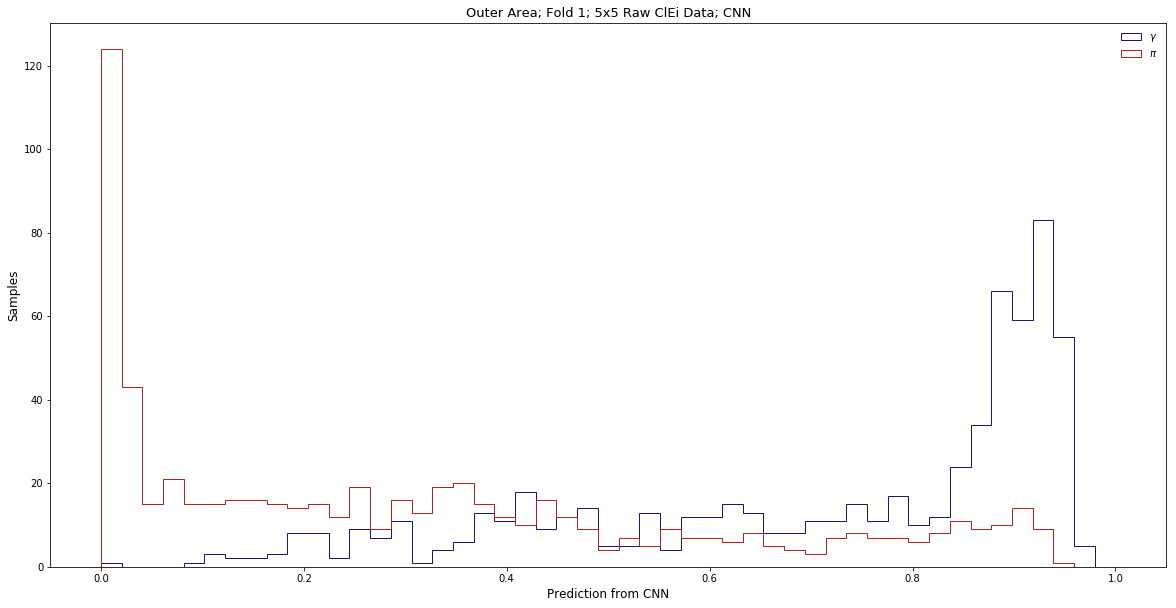

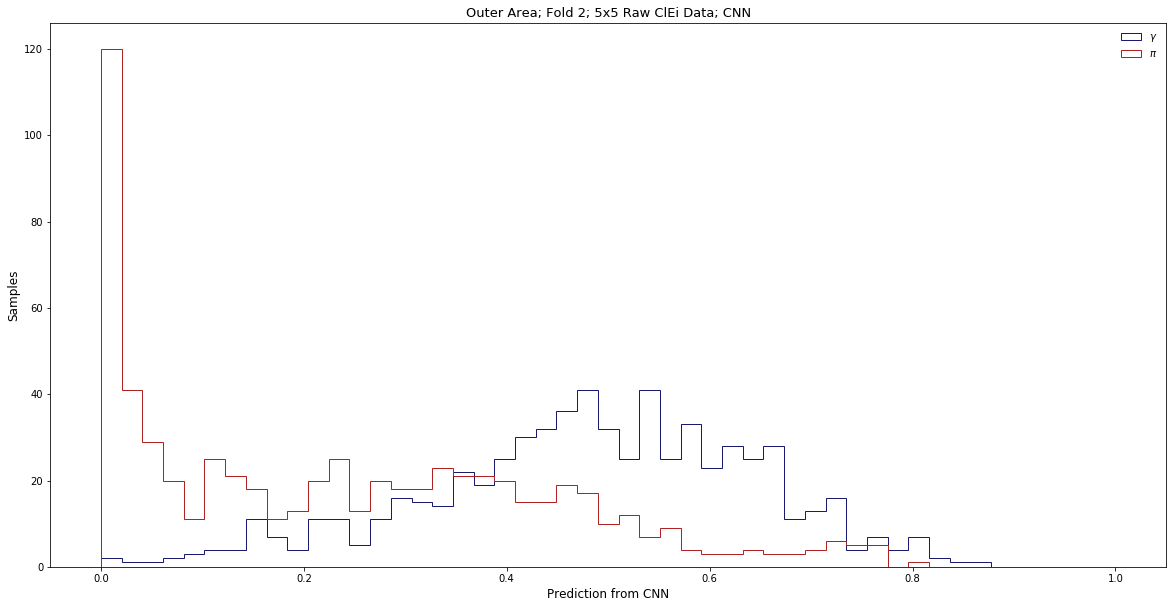

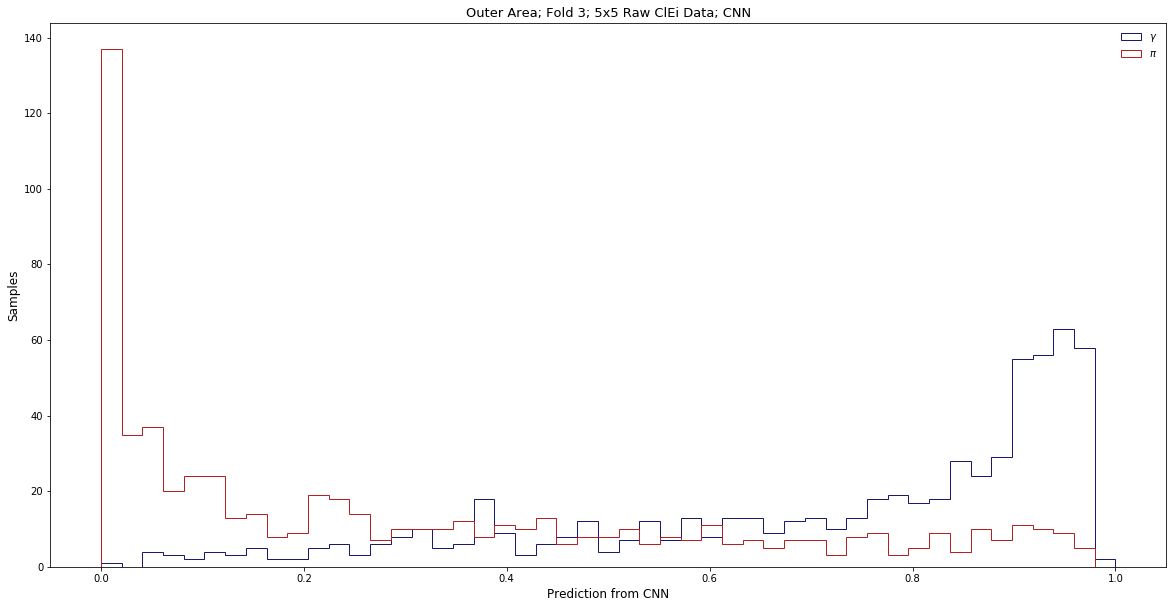

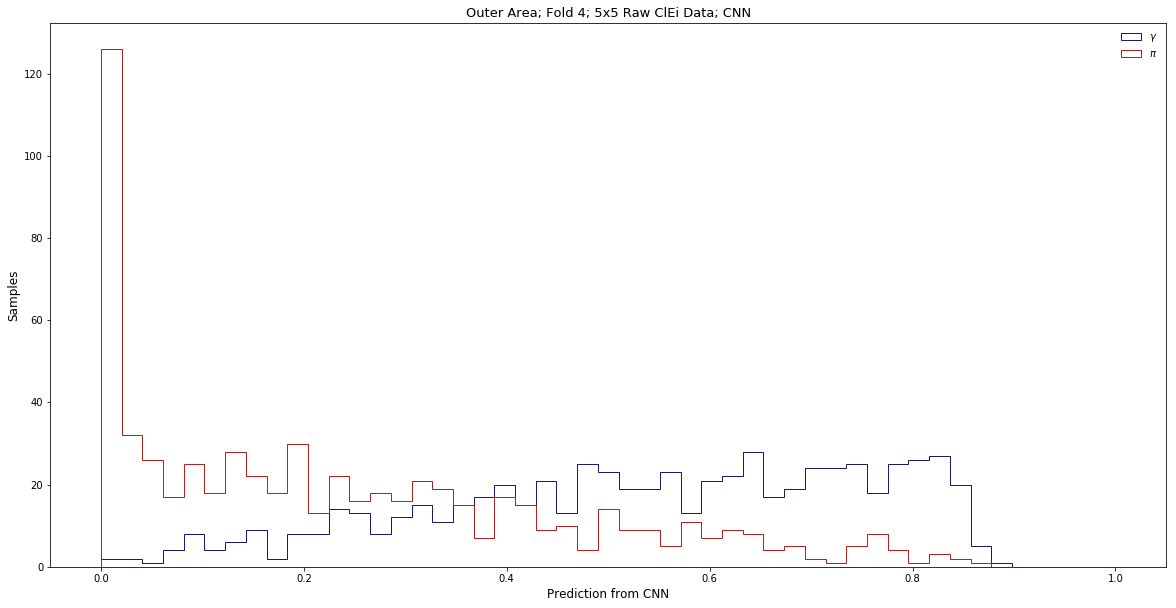

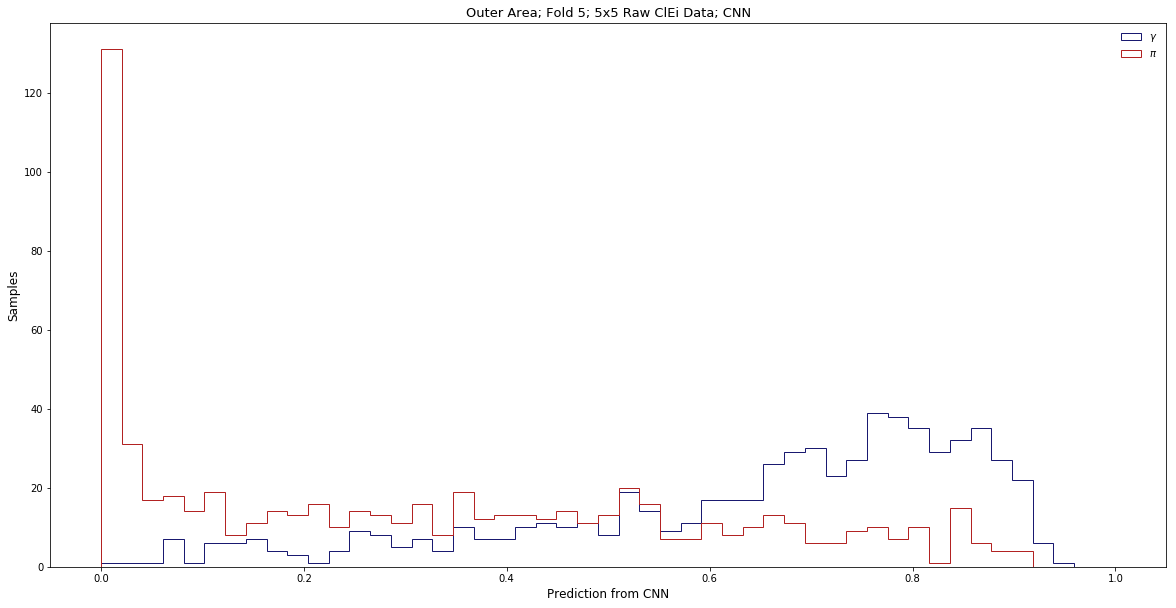

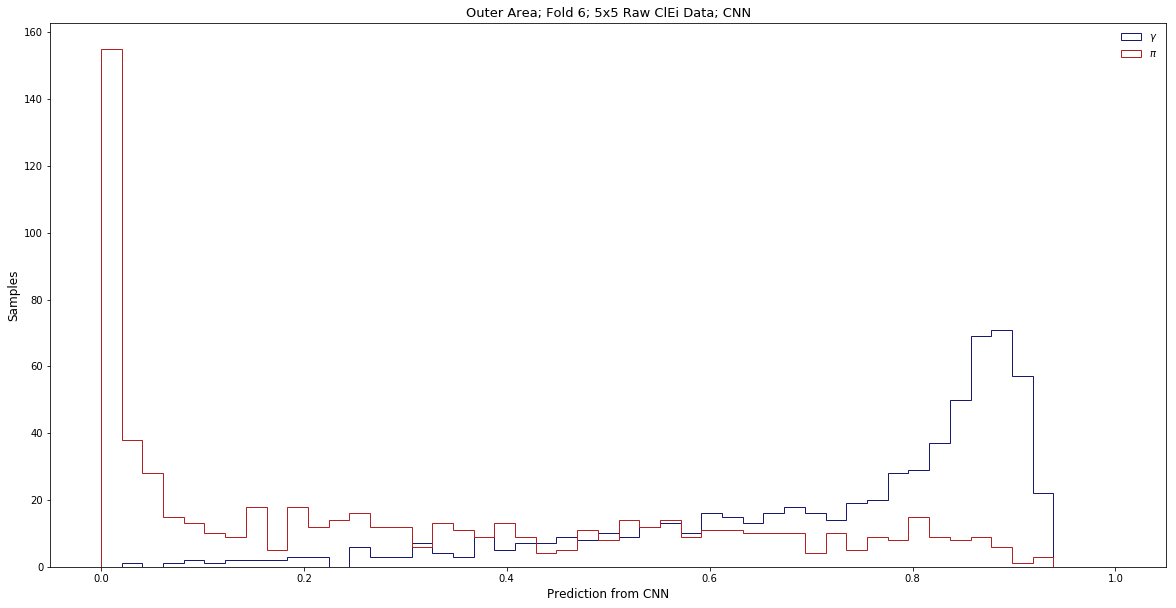

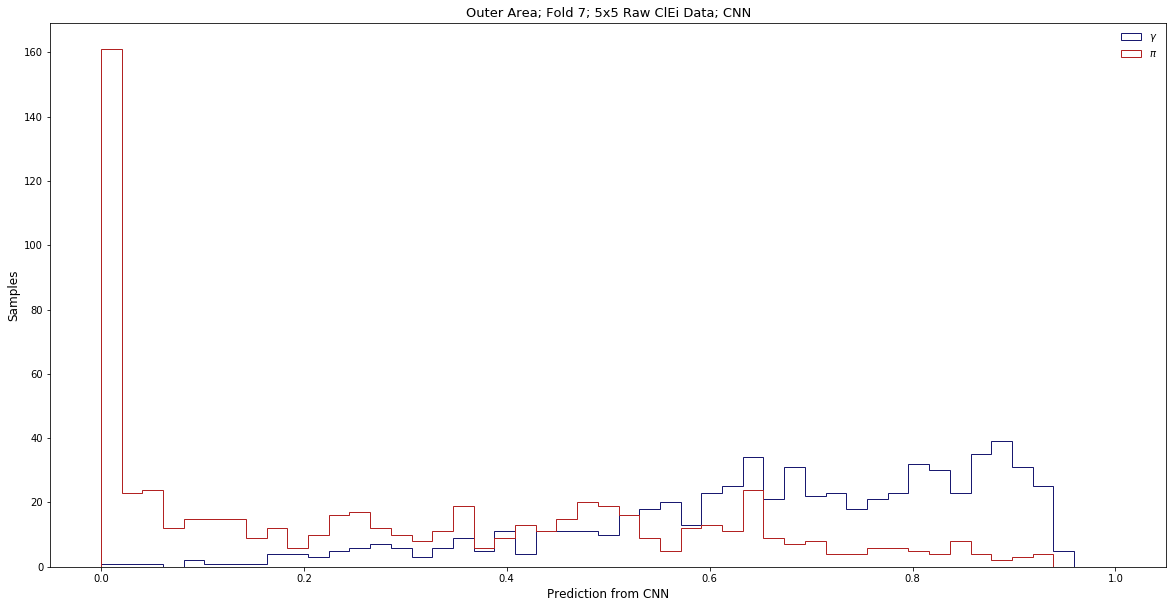

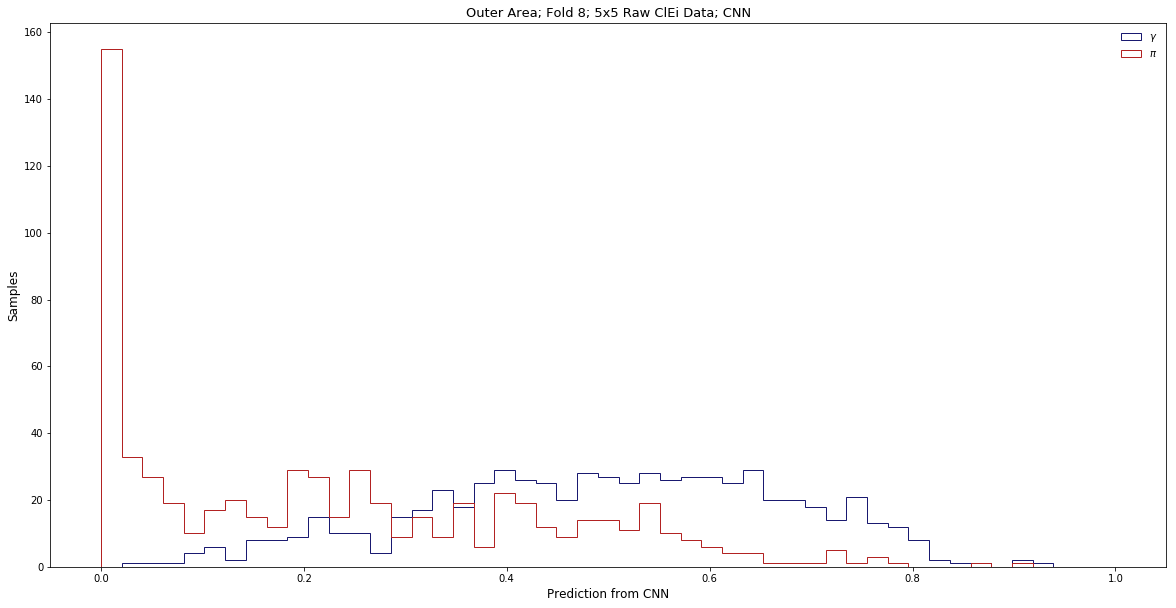

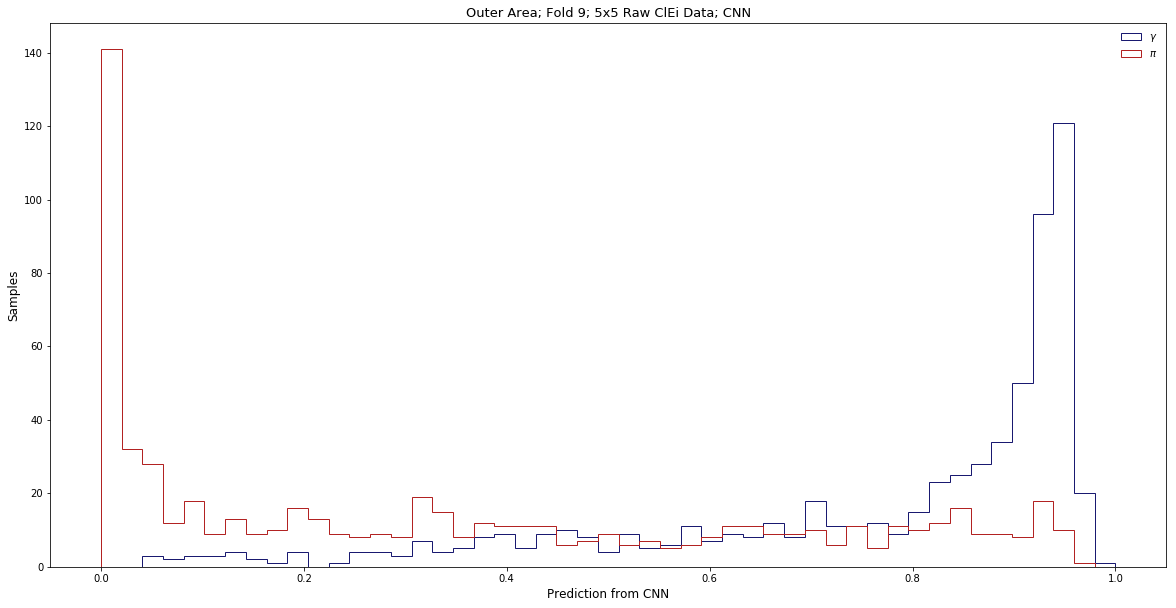

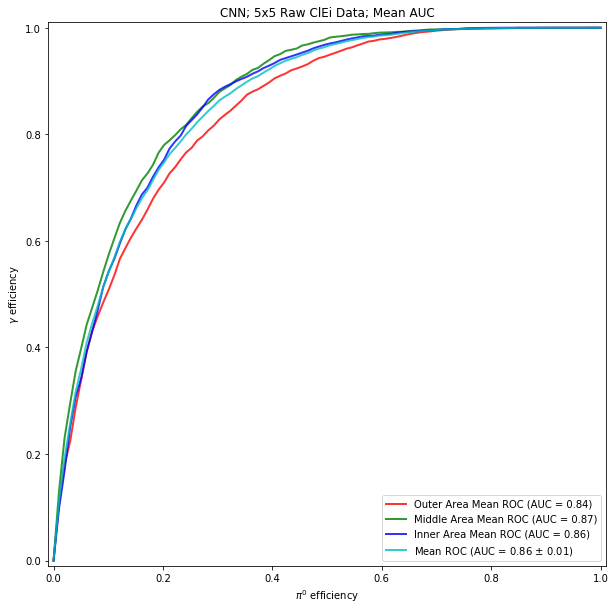

In [14]:
if save_results:
    save_models()
    reproduce_results(save_results_path)

Instructions for updating:
Colocations handled automatically by placer.
0
1
2
3
4
5
6
7
8
9


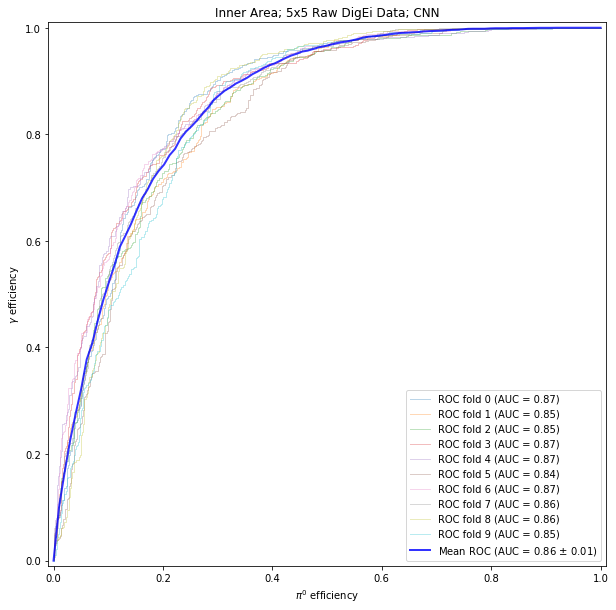

0
1
2
3
4
5
6
7
8
9


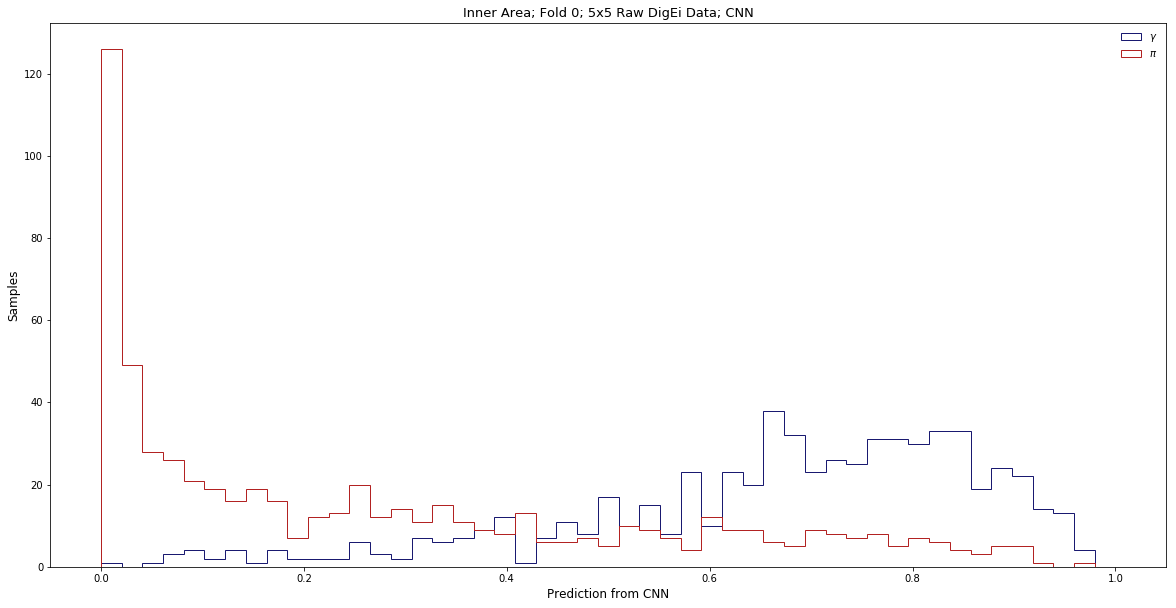

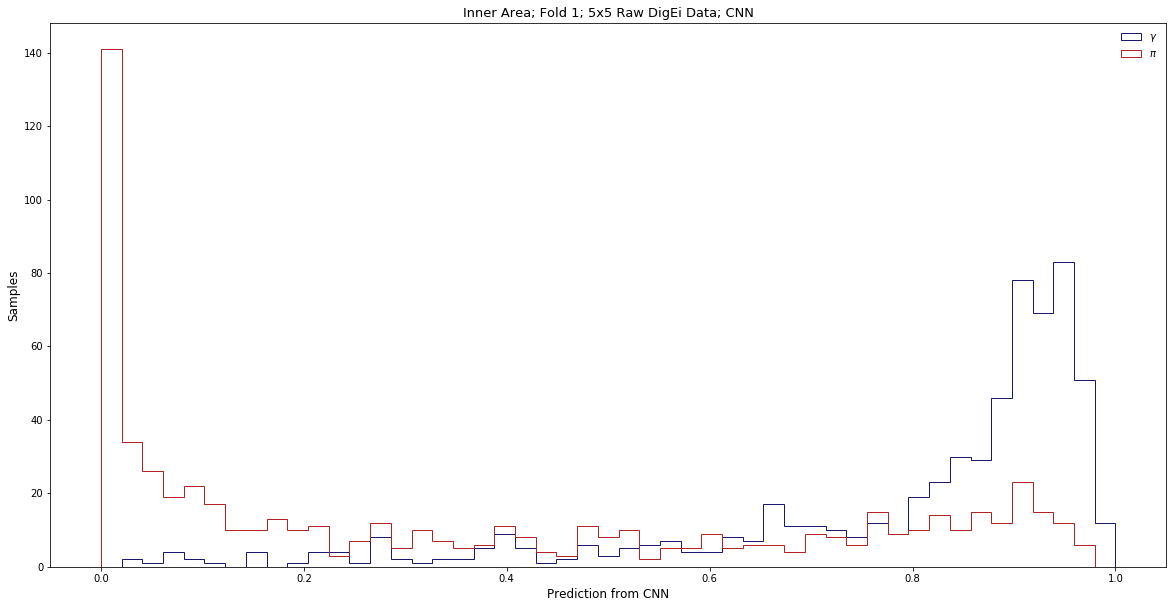

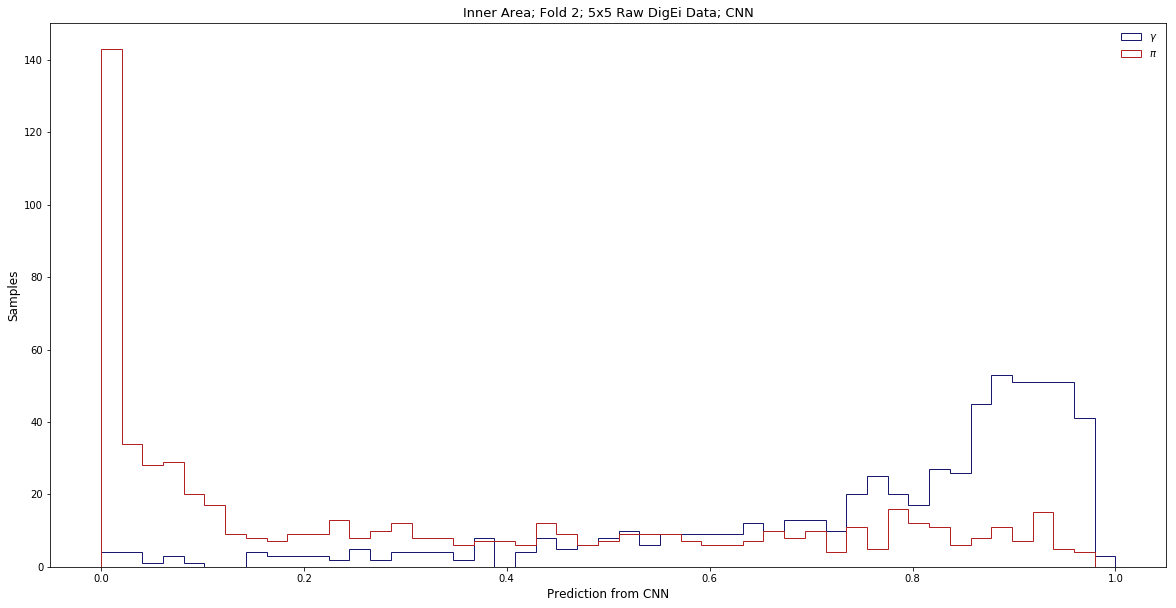

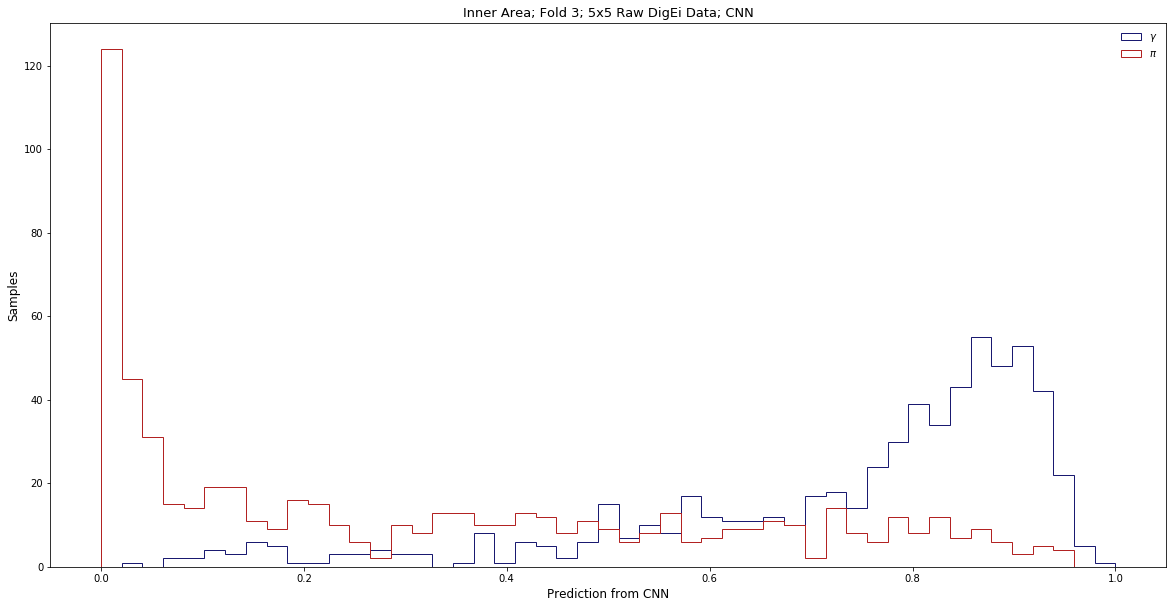

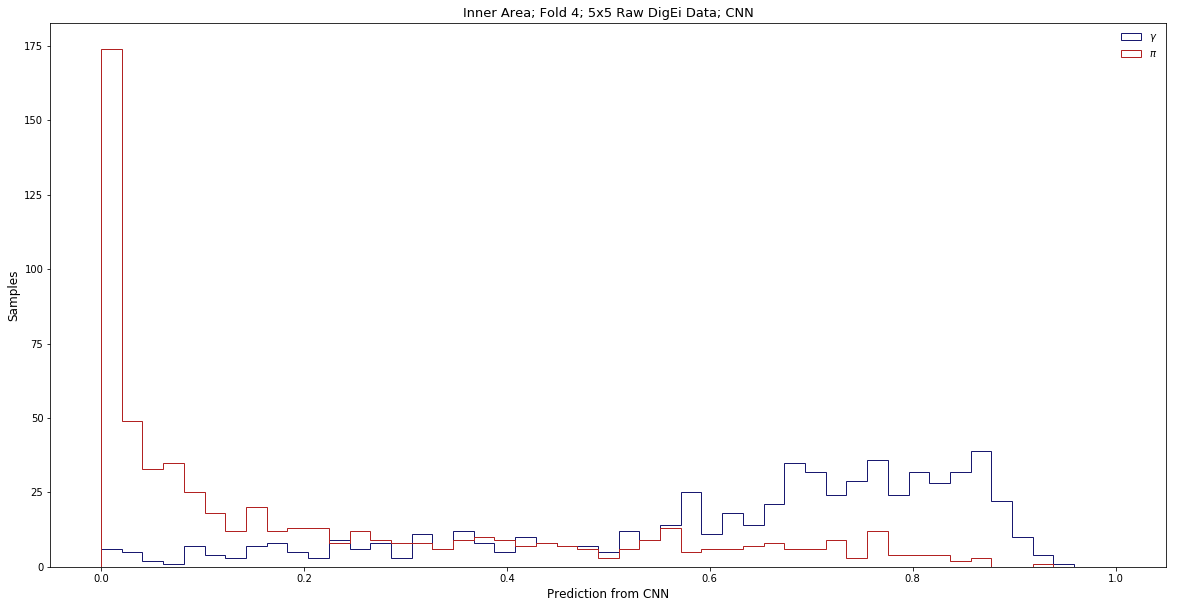

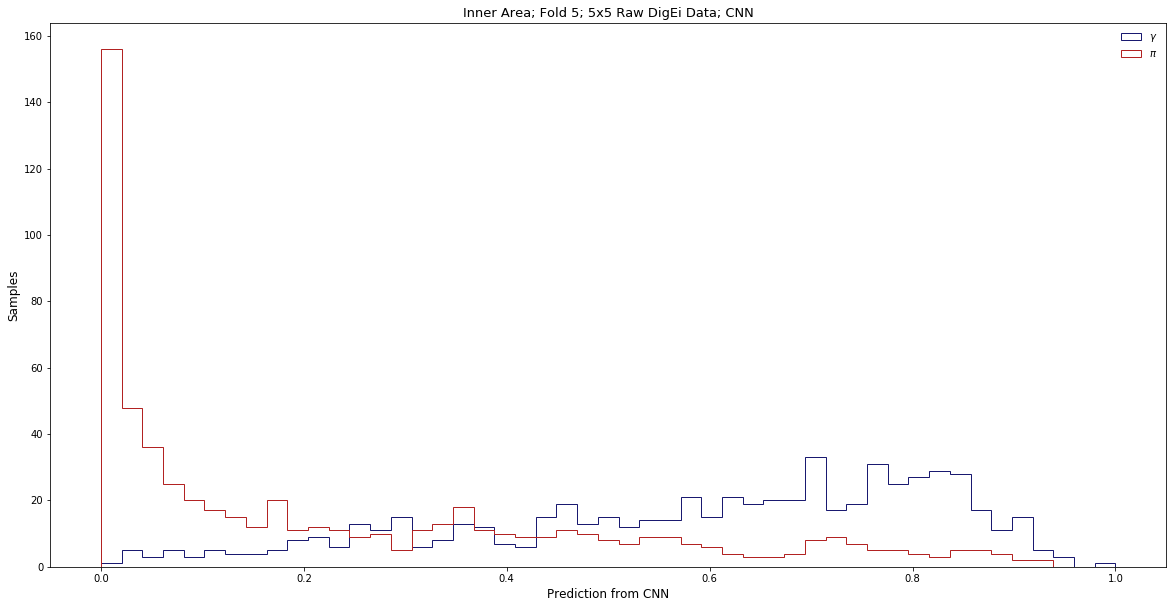

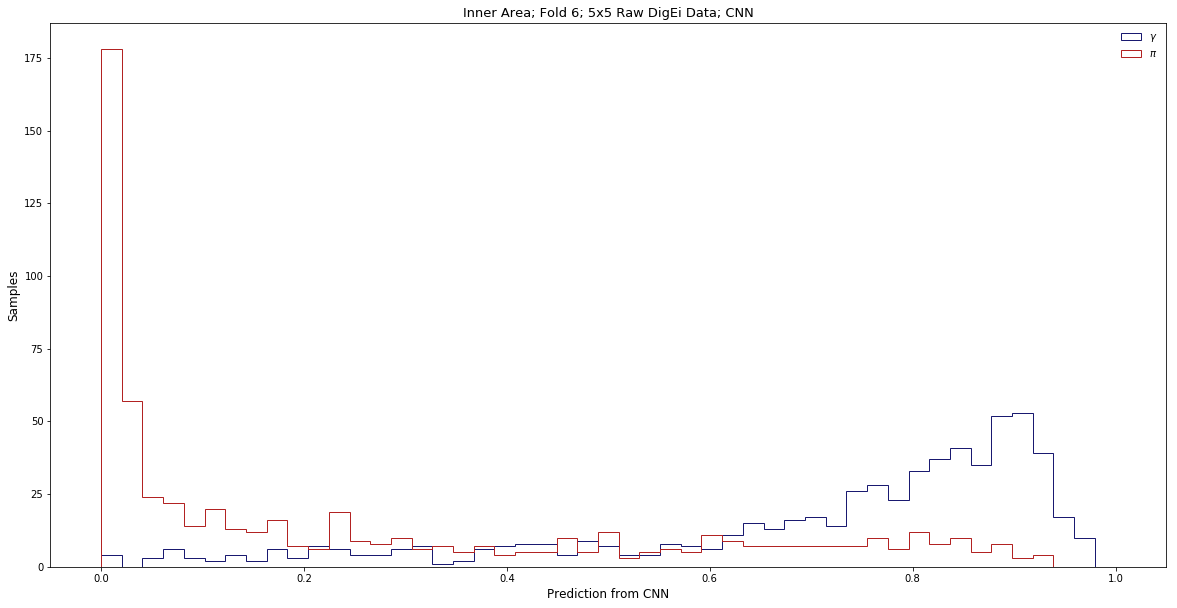

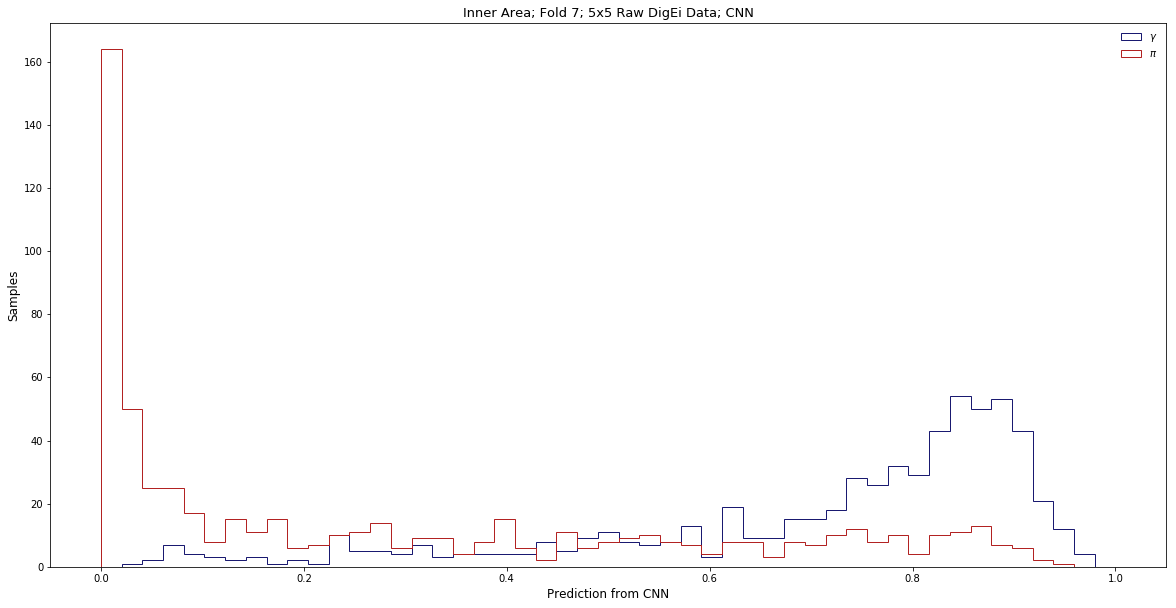

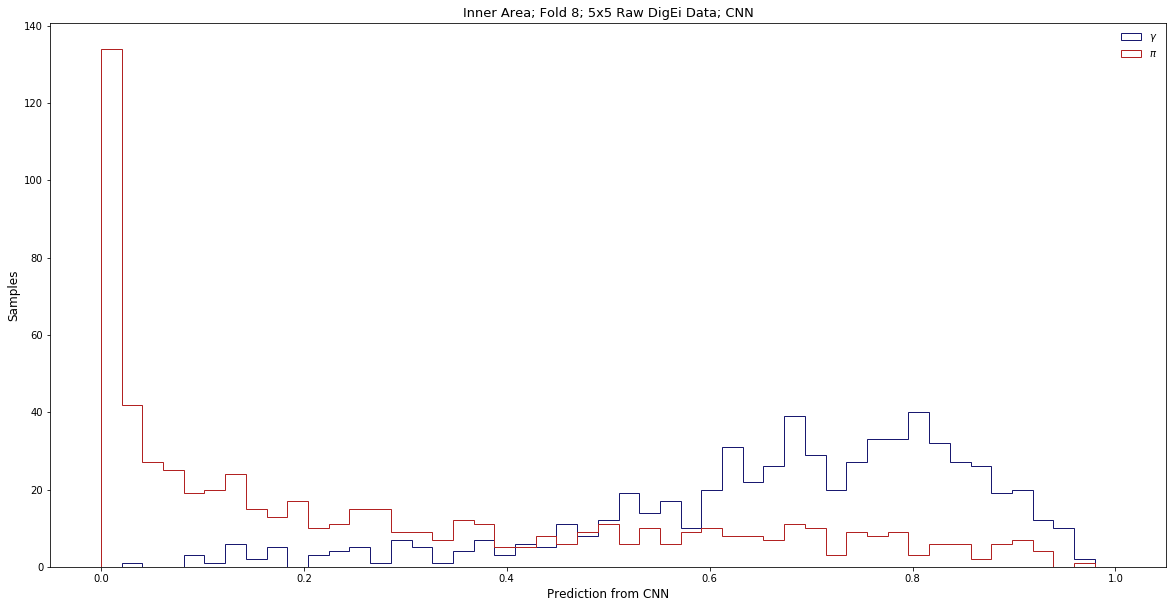

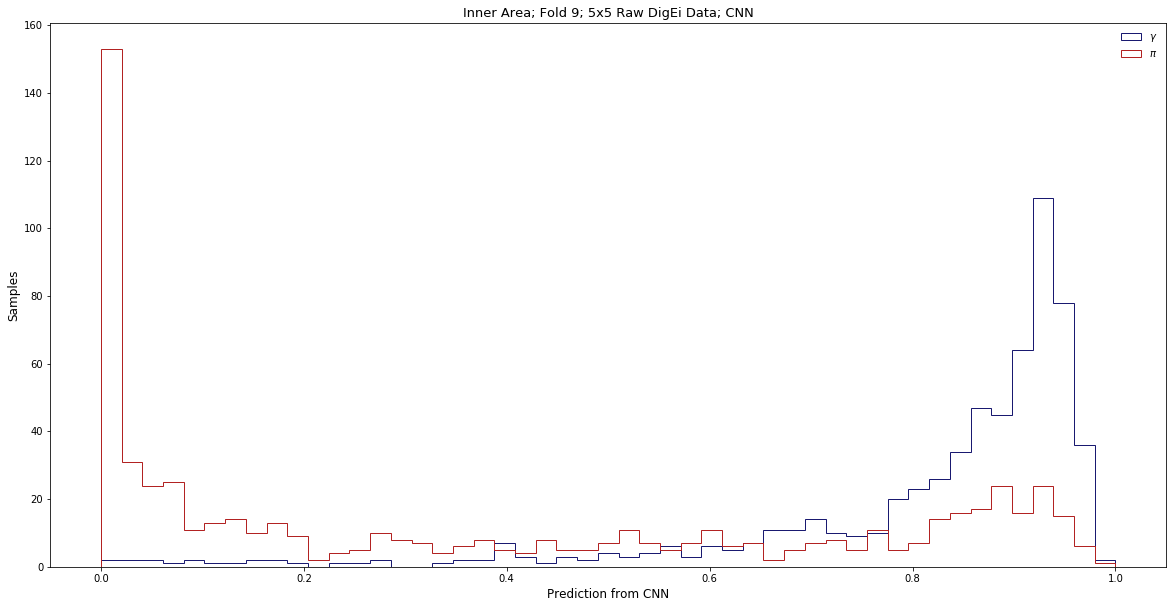

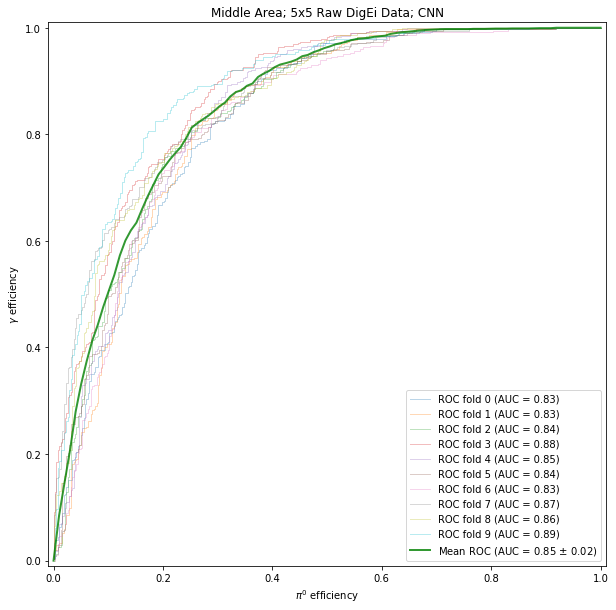

0
1
2
3
4
5
6
7
8
9


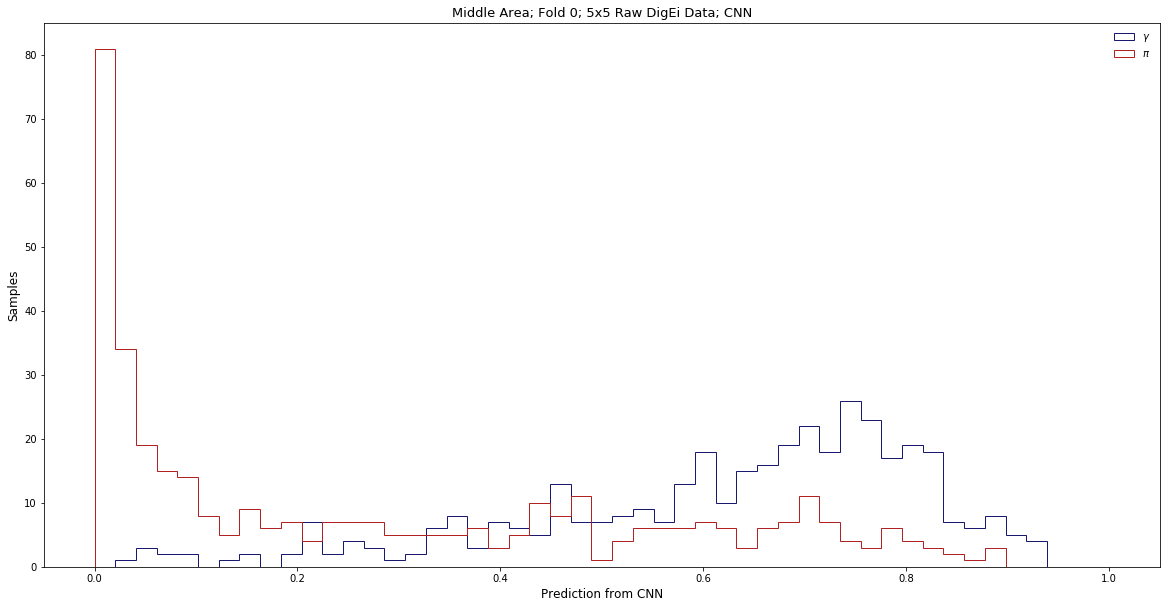

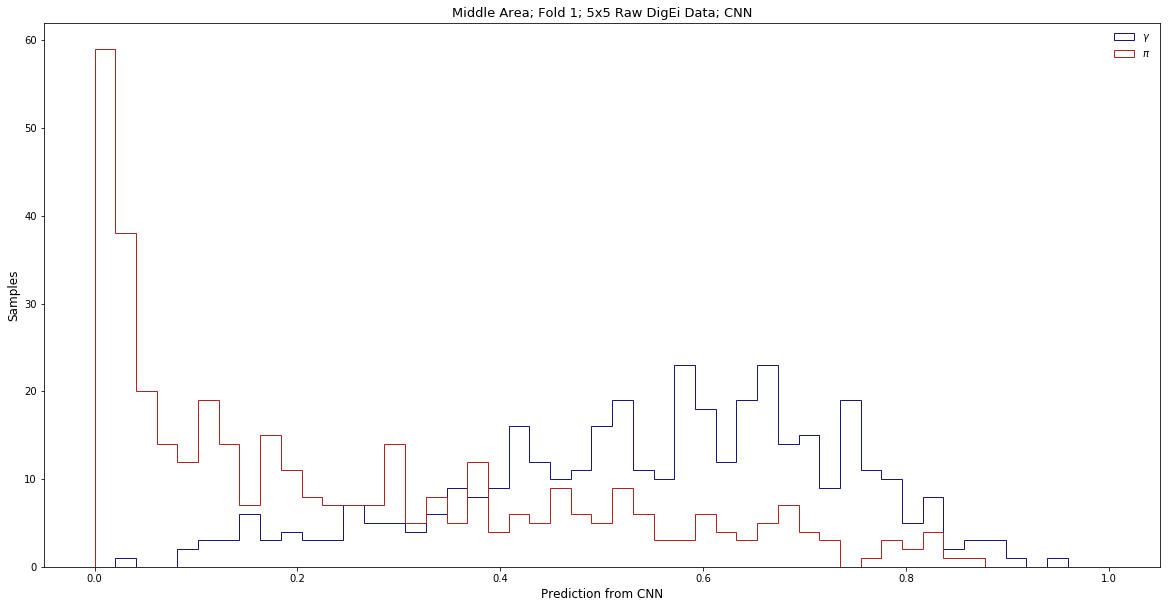

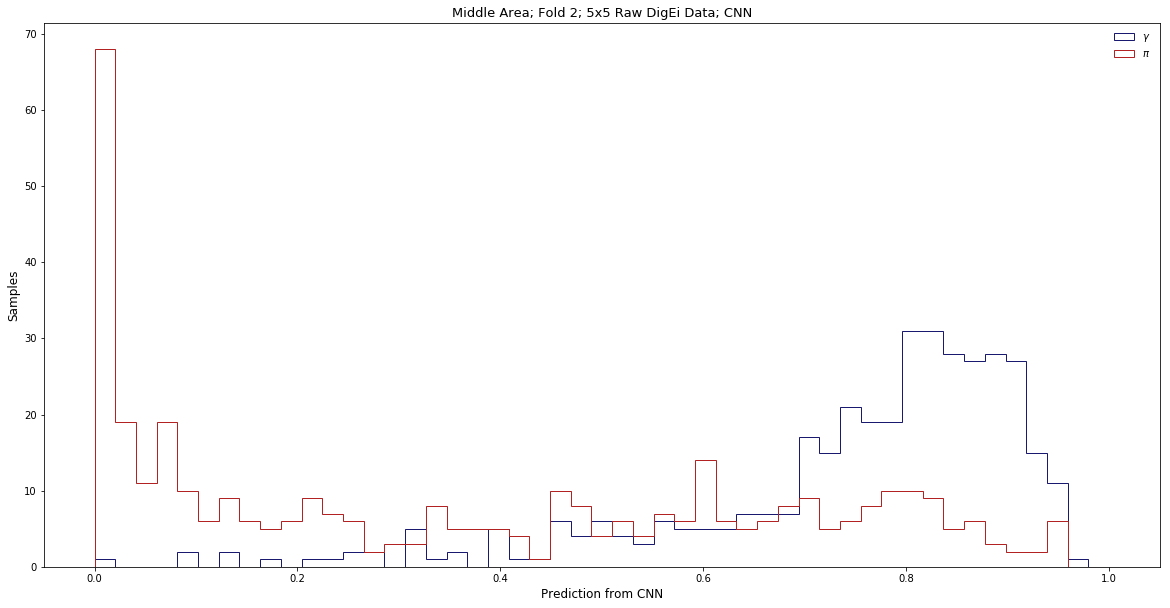

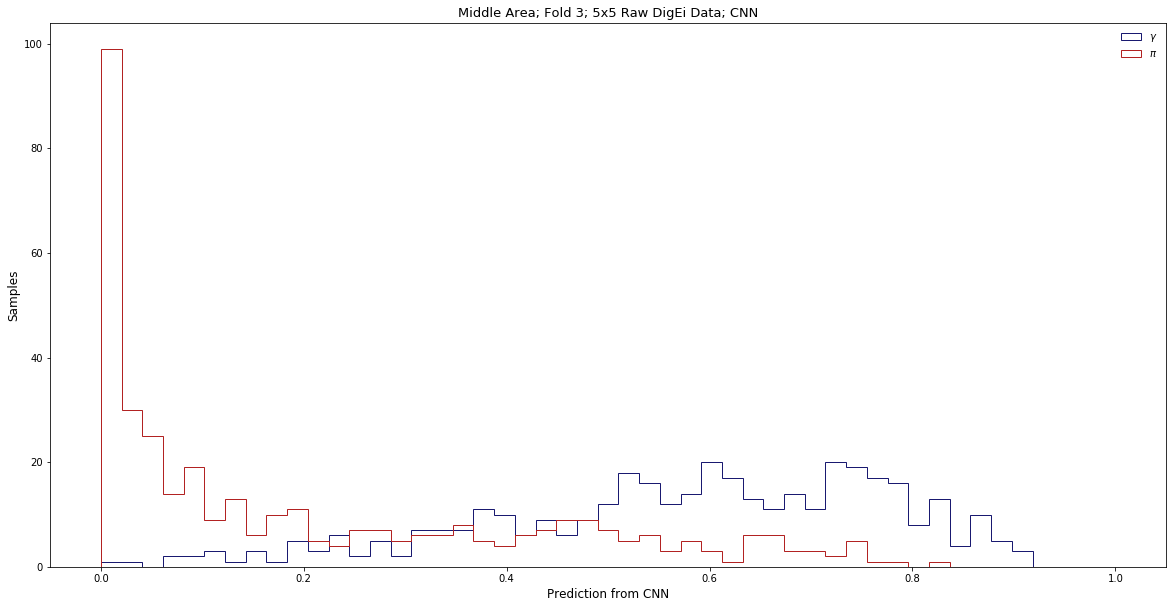

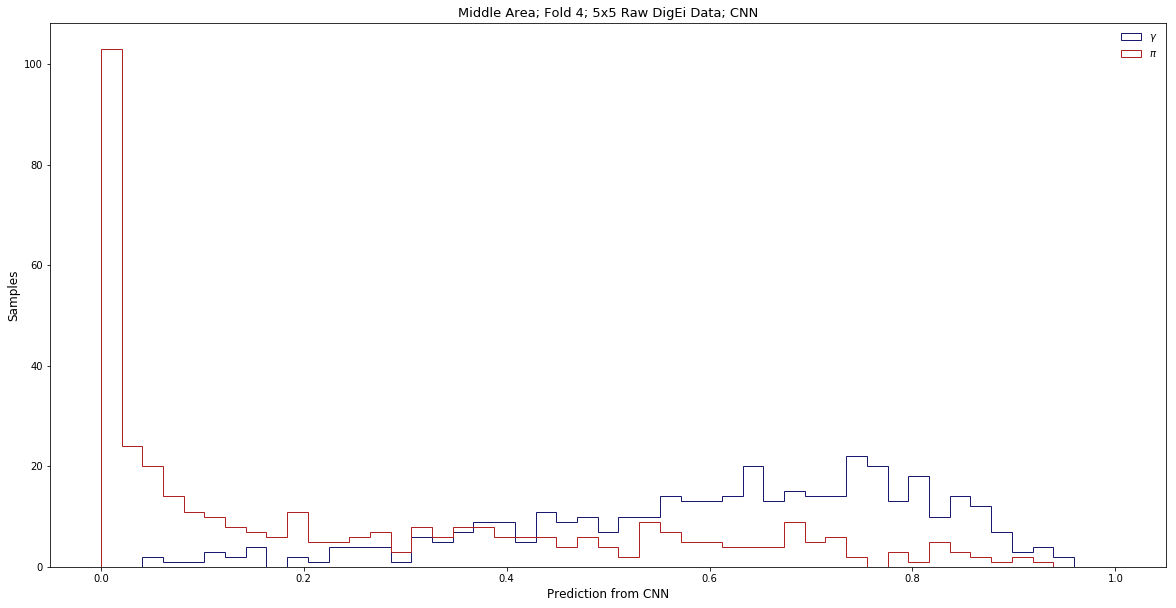

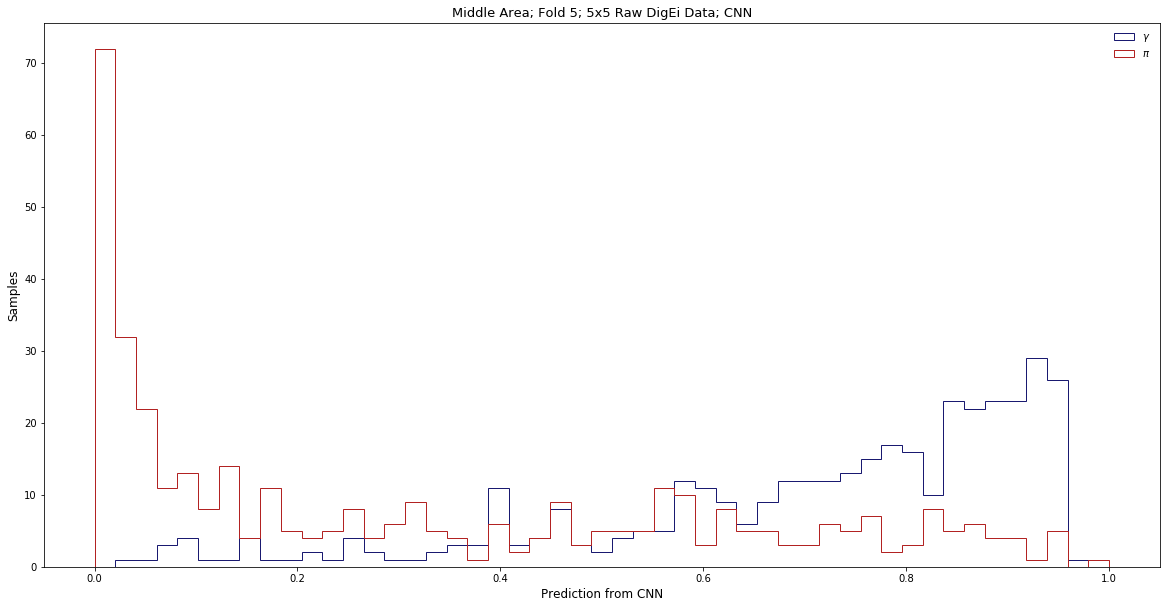

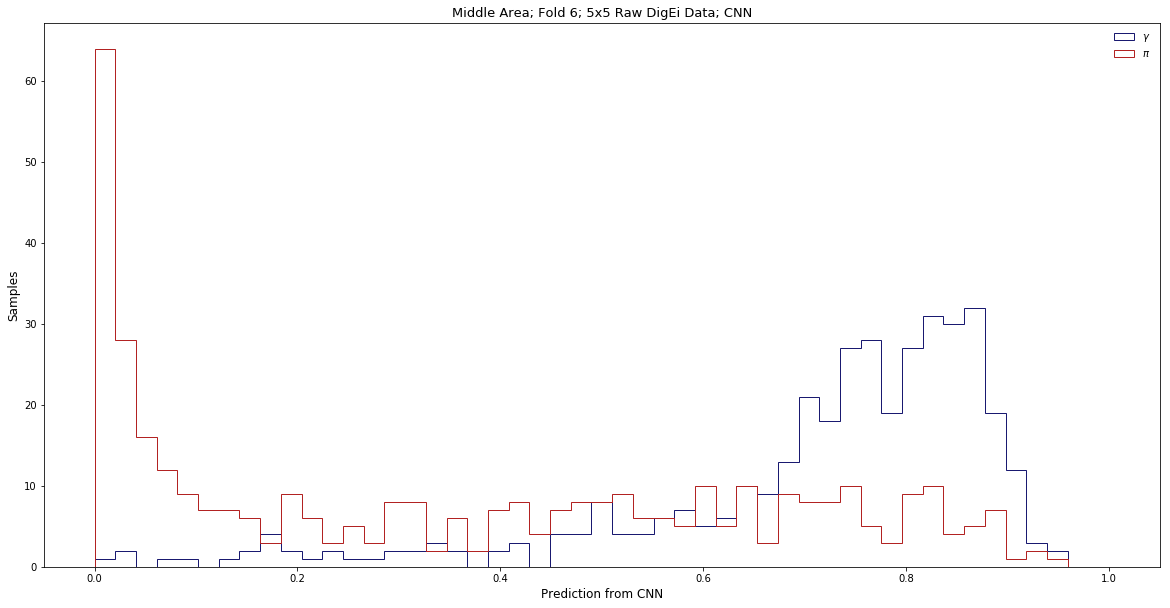

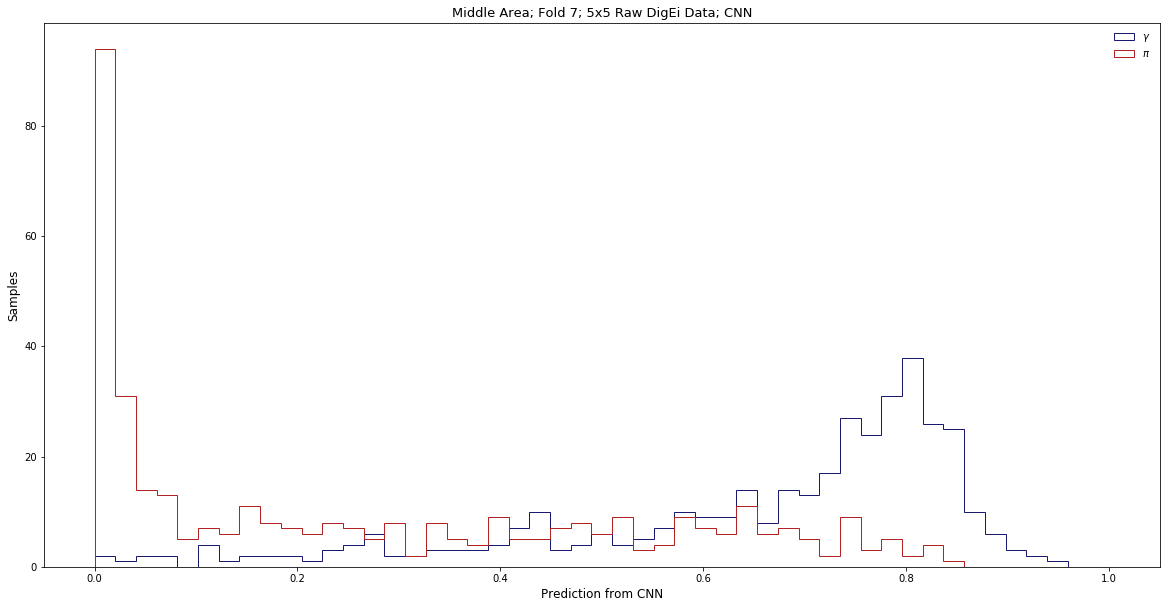

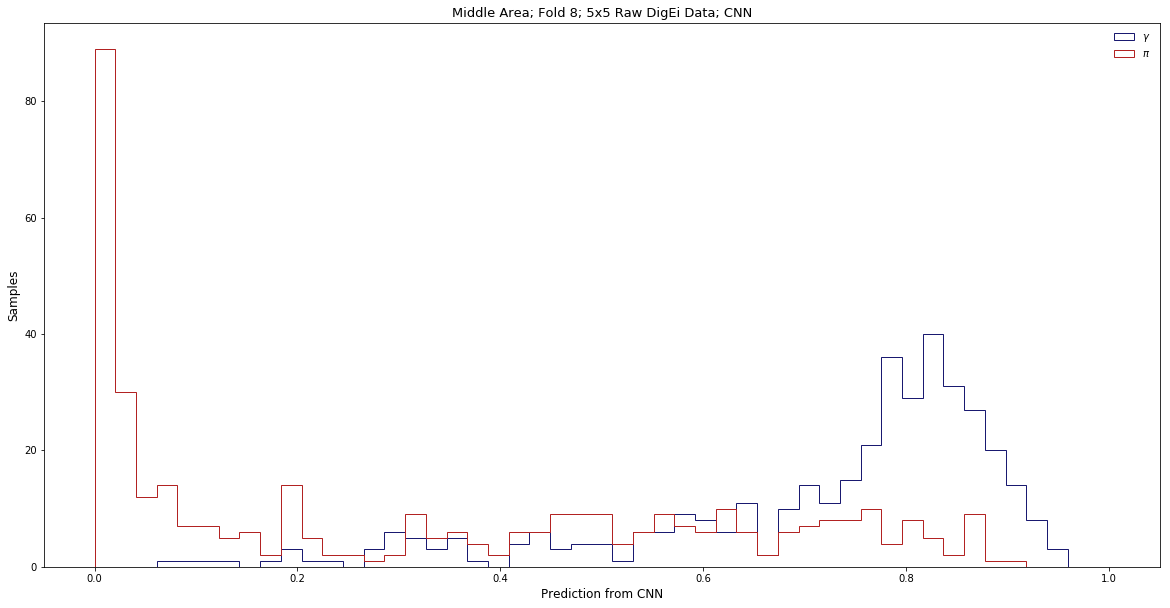

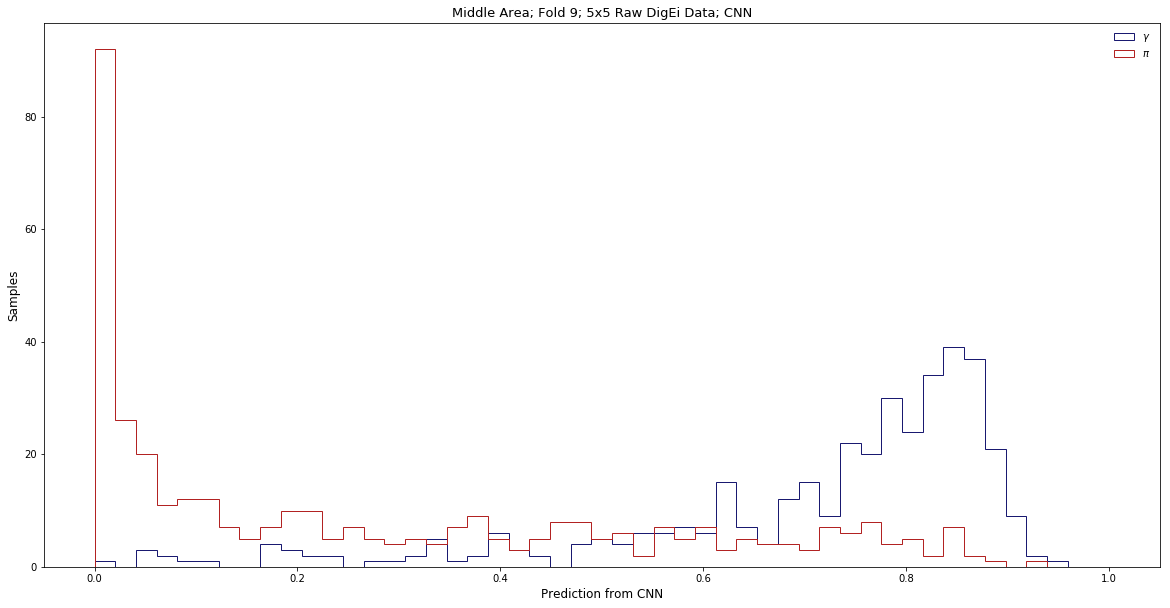

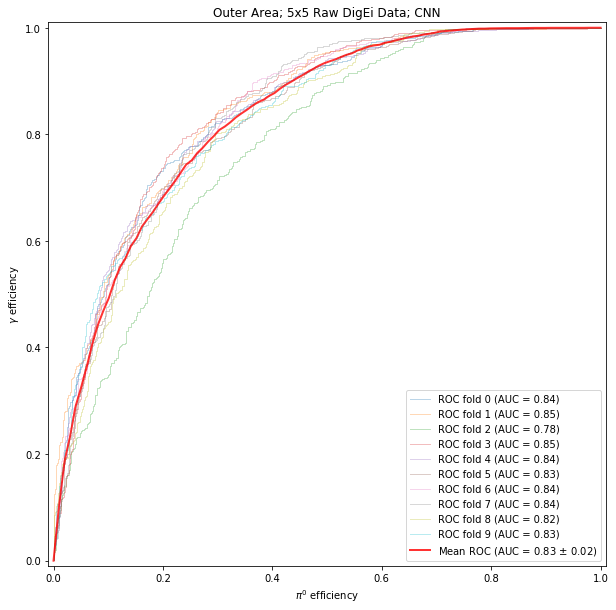

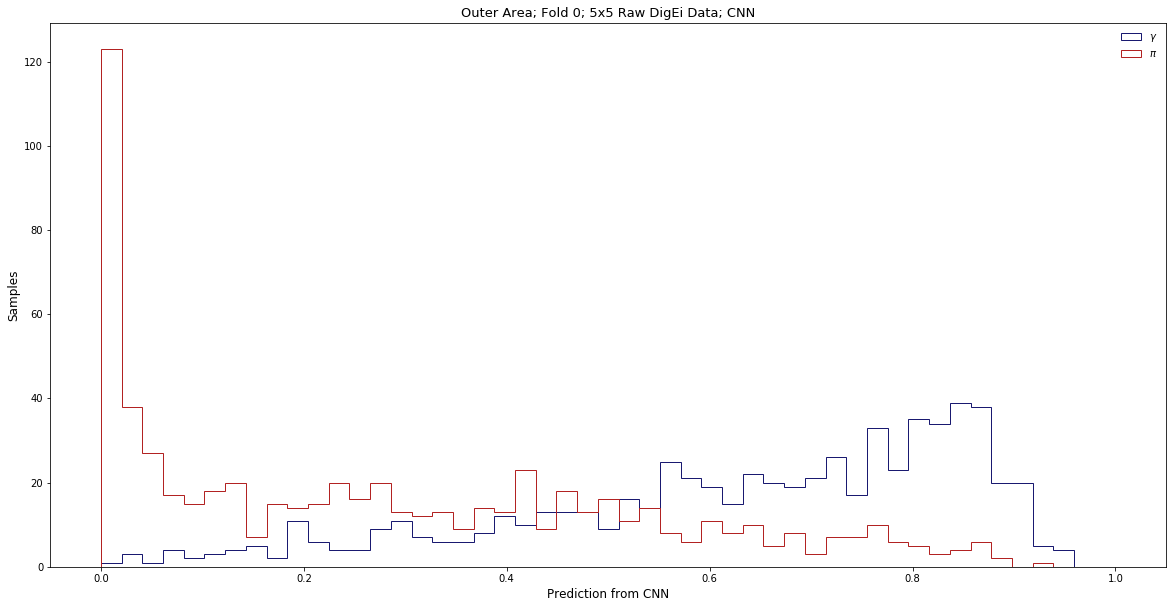

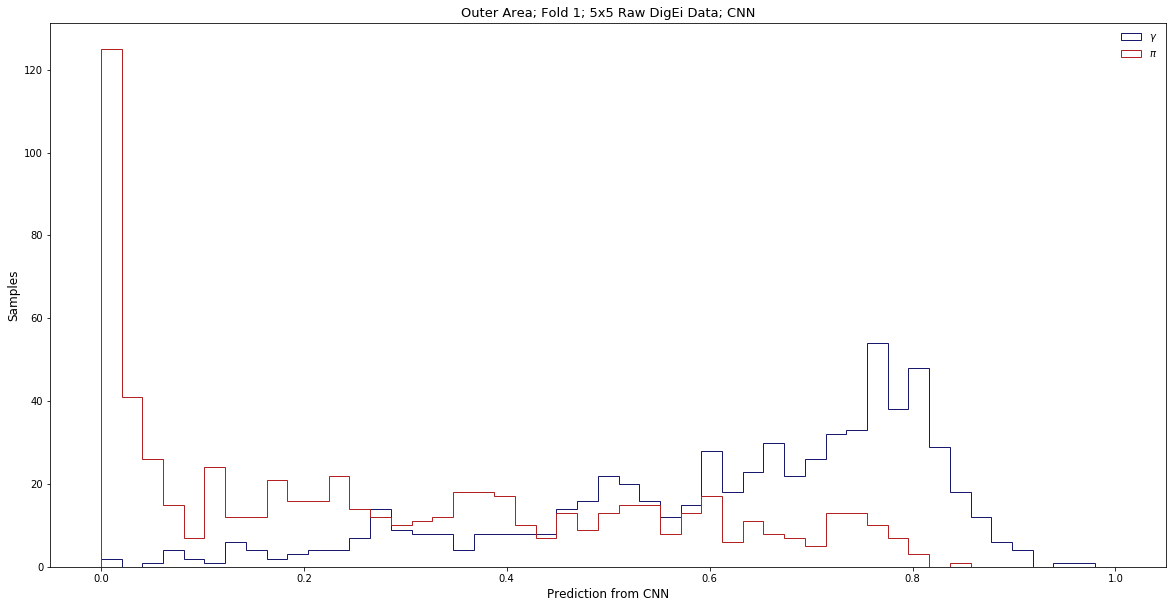

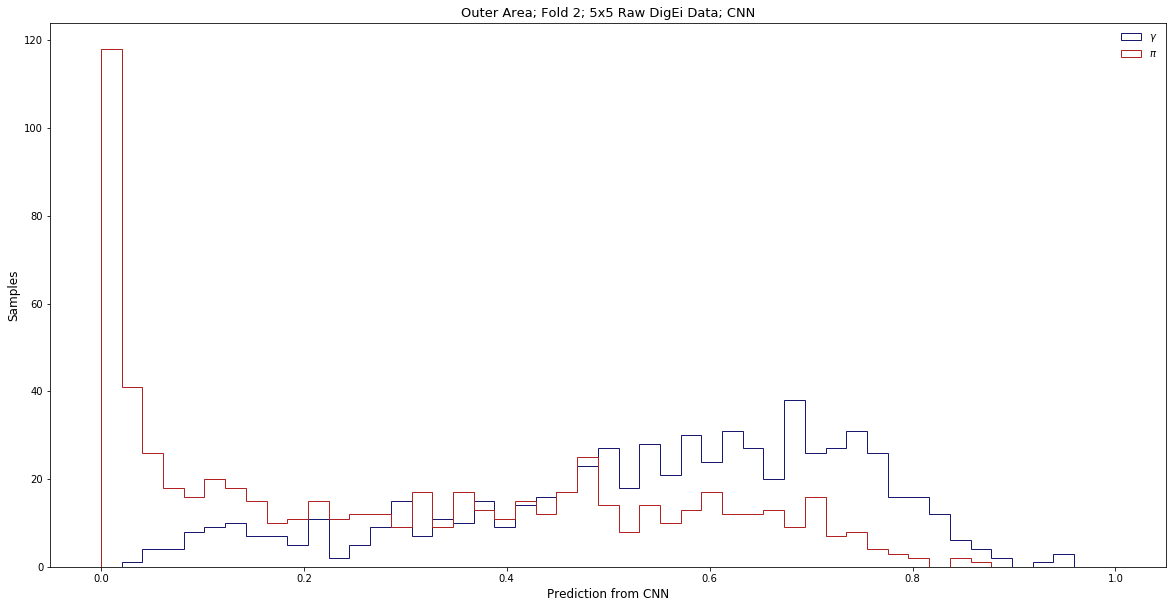

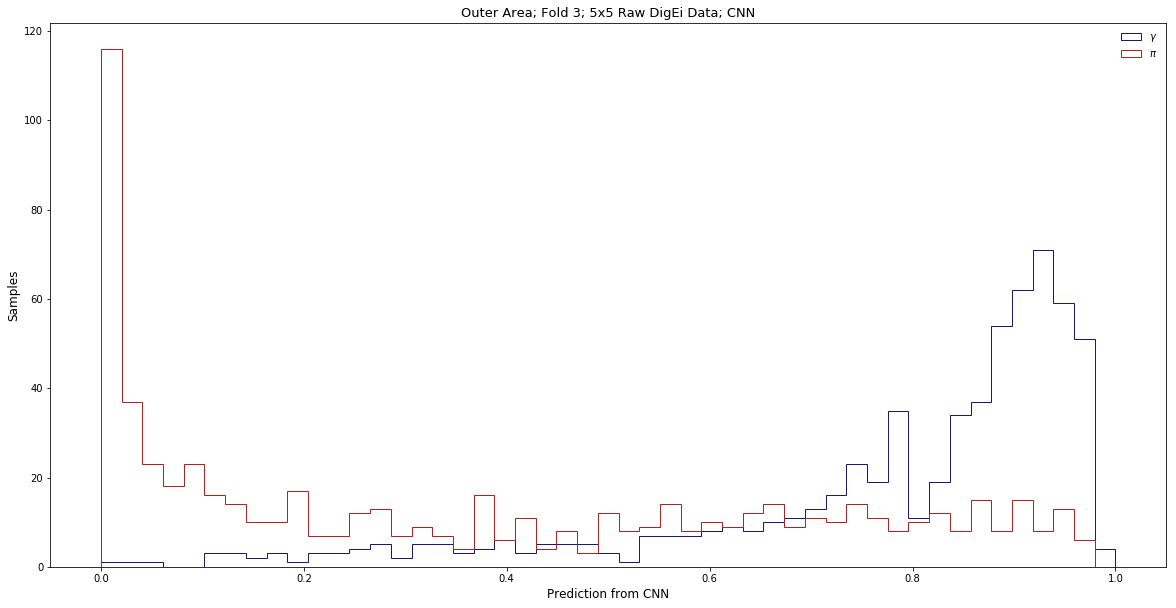

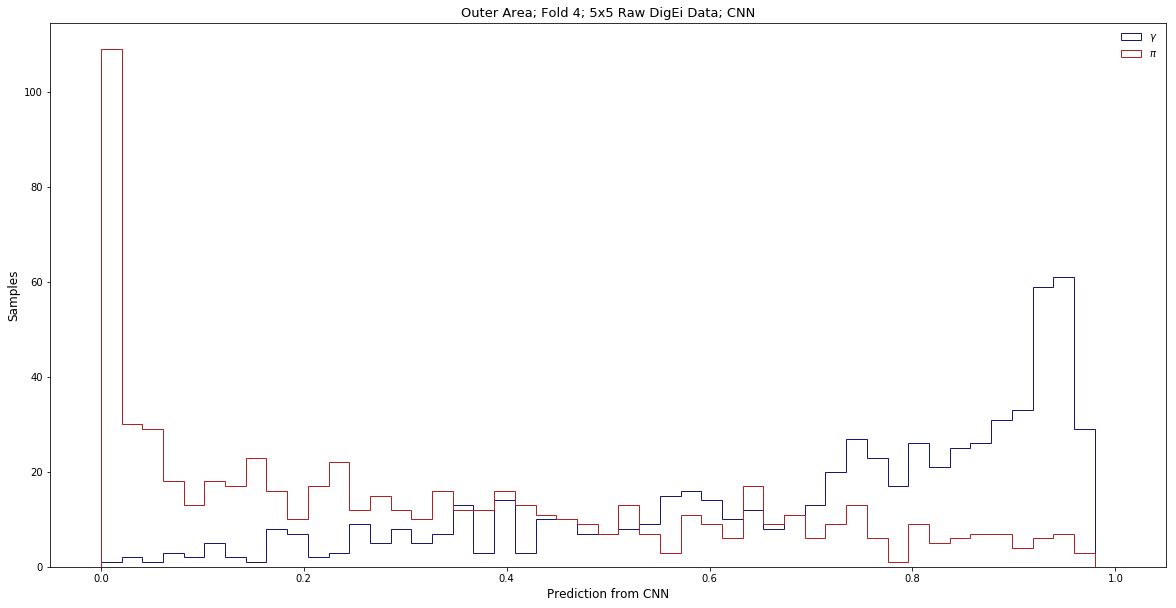

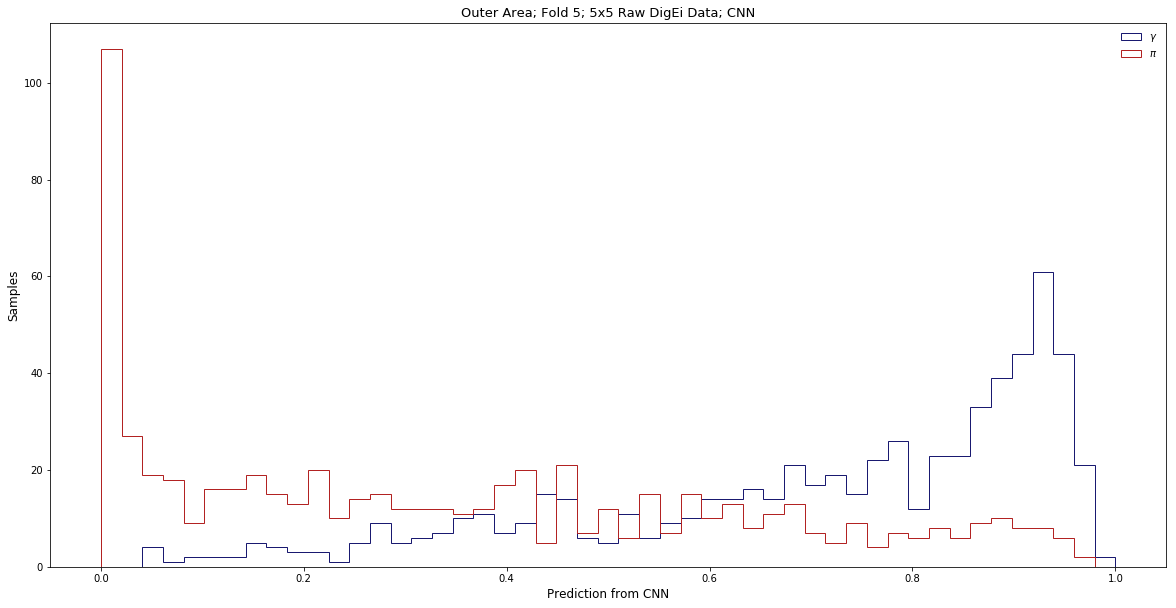

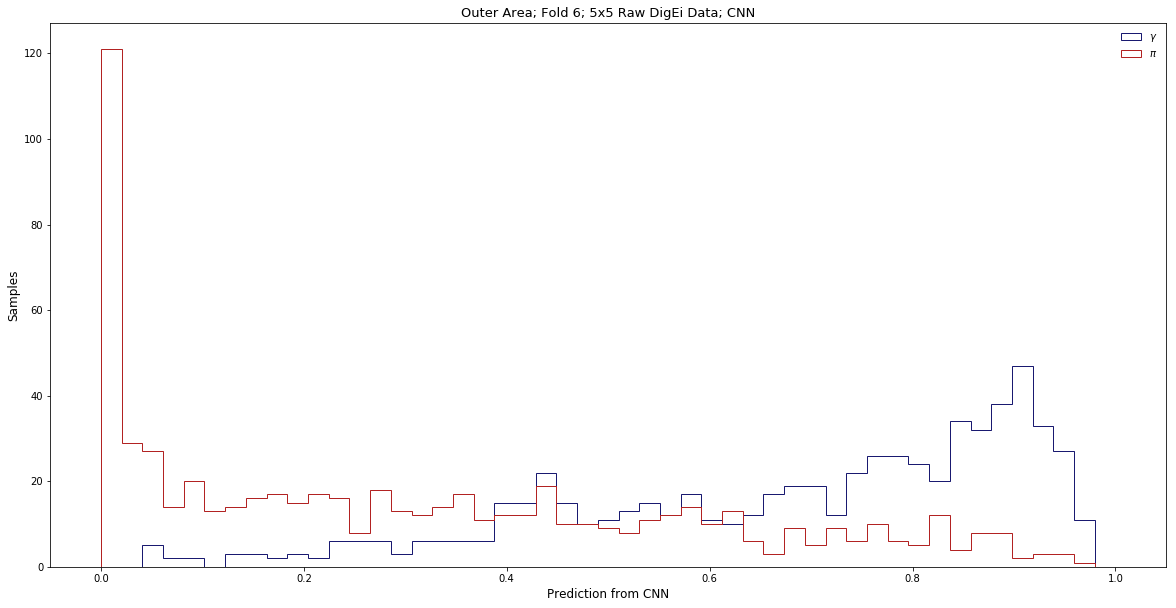

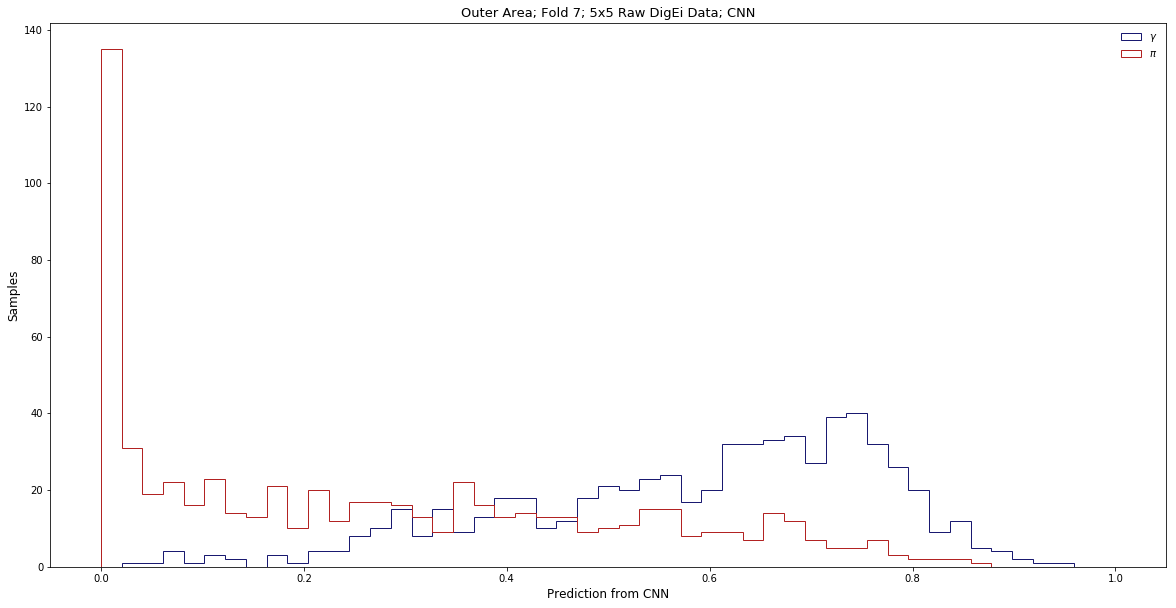

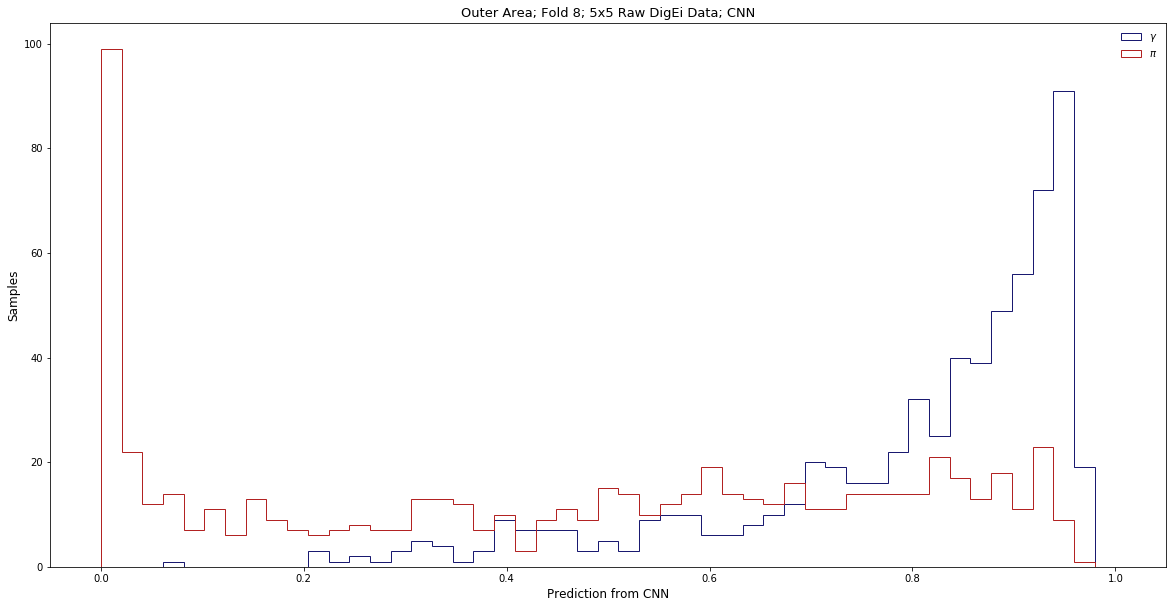

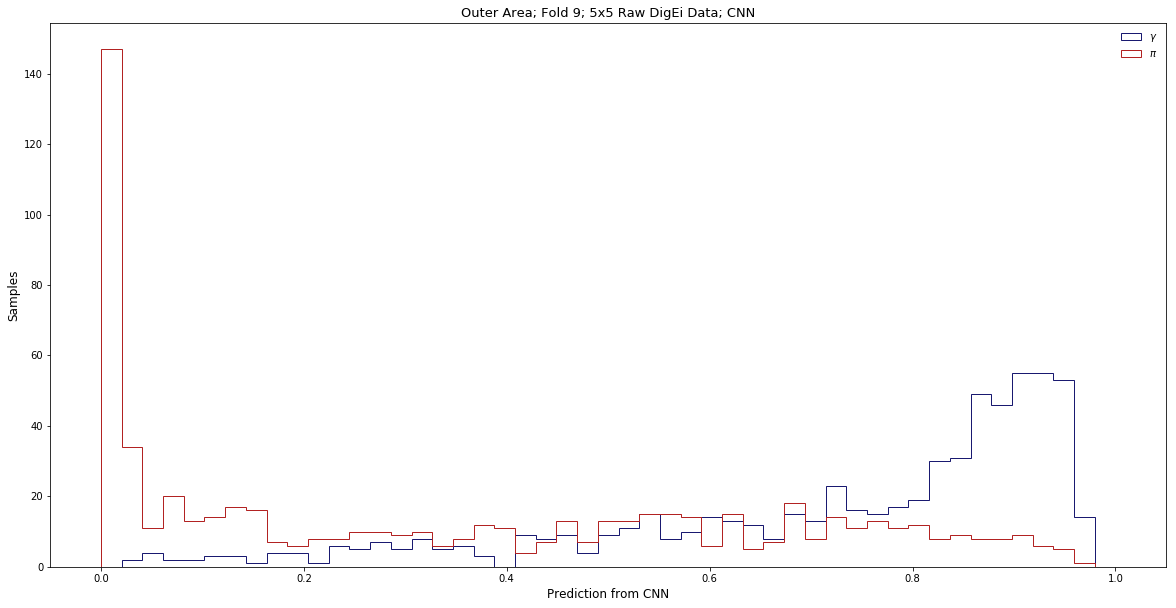

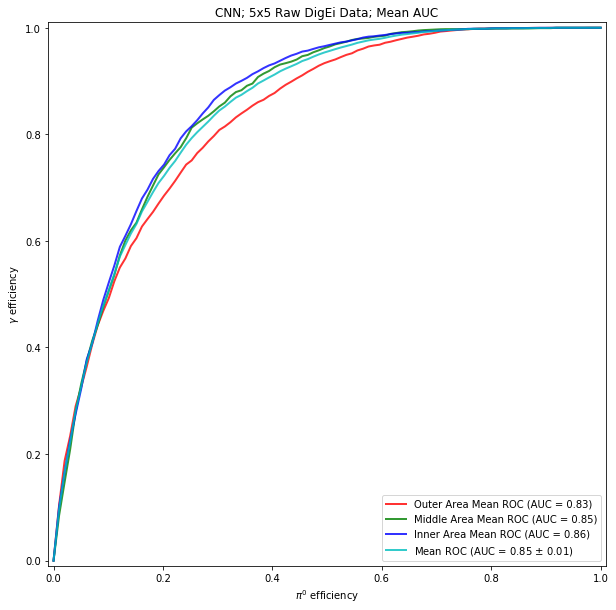

In [11]:
reproduce_results(save_results_path)

In [23]:
out_models[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 5, 5, 16)          160       
_________________________________________________________________
batch_normalization_51 (Batc (None, 5, 5, 16)          64        
_________________________________________________________________
activation_51 (Activation)   (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 5, 5, 8)           520       
_________________________________________________________________
batch_normalization_52 (Batc (None, 5, 5, 8)           32        
_________________________________________________________________
activation_52 (Activation)   (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 5, 8)           72        
__________

In [17]:
from keras.utils import plot_model
plot_model(out_models[0], to_file='model.png')

In [19]:

X_train, X_test, y_train, ytest = divide_data(2,0)

In [ ]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

classifier = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size': [25,50,100,150,200],
              'epochs': [25,50],
              'optimizer': ['sgd', 'Adadelta']}
grid_search = GridSearchCV(estimator=classifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 3)
grid_search = grid_search.fit(X_train, (y_train.values))

In [ ]:
grid_search = grid_search.fit(X_train, (y_train.values))
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
df = pd.DataFrame(grid_search.cv_results_)
df.to_json('CNN_CV_grid_search_result.json')

In [ ]:
df

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

